# Problem Set 2 (93 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

## Submatrices (bonus).


Let $U$ be an $n \times r$ orthogonal matrix, $n \geq r$. It is well known, that such matrix has $r \times r$ non-singular submatrix $\hat{U}$. To measure ``non-singularity'' of this submatrix one can use the minimal singular value, or the norm of the inverse $\Vert \hat{U}^{-1} \Vert.$

Suppose we select the submatrix that has the smallest possible norm of the inverse among all $r \times r$ submatrices of $U$. What is the maximal value of such norm? Mathematically, we need to estimate

$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1} \Vert_2.$$

Is it true that $t(n, r) \leq \sqrt{n}$?




$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1}\|_2 = \max_U \min_{\hat{U}} \frac{1}{\sigma_\min(\hat U)} = \frac{1}{\min_U \max_{\hat U} \sigma_{\min}(\hat U)}$$

Volume of a square matrix is the absolute value of its determinant. Assume that the submatrix $\hat P$ of the greatest volume resides in the first $r$ rows. Consider
$$ \tilde U = U \hat P^{-1} = \begin{pmatrix} 
I \\
V \end{pmatrix}$$
In $\tilde U$ submatrix with maximum volume is also located in the first $r$ rows. If $|\tilde u_{ij}| > 1$, then by swapping $i-th$ and $j-th$ rows we could obtain new first $r$ rows that form a submatrix of bigger volume (greater than 1). It contradict the choice of $\hat P$.
$$\sigma^{-1}_\min(\hat P) = \sigma_\max(\tilde U) \leq \sqrt{\| I \|_2^2 + \| V \|_2^2} \leq \sqrt{r(n - r) + 1}$$

Source: https://core.ac.uk/download/pdf/82573071.pdf

# Problem 1 (QR algorithm) (22 pts)

One of the way to find eigenvalues for real matrix $A$ of size $(n,n)$ is **QR algorithm**. Each iteration of the algorithm consists of two main steps:

1. Compute QR decompostion $A_k = Q_kR_k$
2. Compute new matrix $A_{k+1} = R_kQ_k$

$A_0 = A$

From lecture materials you have seen that algorithm complexity in general is $O(Nn^3)$ ($N$ - number of iterations). But we can make an improvement by transforming matrix to **Upper Hessenberg form** ([link](https://en.wikipedia.org/wiki/Hessenberg_matrix)) before running the algorithm. 

The good property of Hessenberg matrix is preservation of its structure during QR algorithm iteration. In other words, if $A_{k}$ is Hessenberg matrix, then $A_{k+1}$ will also be a Hessenberg matrix. We can use this property to reduce complexity of each iteration. Since we need only to zero first lower subdiagonal for QR factorization (first step in each iteration) we can use **Givens rotations** $O(n^2)$ instead of **Householder reflections** $O(n^3)$. Now, the last question is how to obtain Hessenberg matrix - use Householder reflections. Since it is done only once (initialization stage), complexity of algorithm will not be increased.

Final algorithm:

I. **Initialization**

> - Transform original matrix $A$ to Hessenberg form $H_0 = U^TAU$ using Householder reflections.

II. **Loop**

> **for** k in range(**N**):
> -  Compute QR using Givens rotation: such matrices $Q_k,R_k$ that $H_k = Q_kR_k$

> - Update matrix $H_{k+1} = R_k Q_k$



## What do you need to do:
### Theoretical part
<!-- 1. For real square metrices $Q,A,\hat{A}$ prove that if we have relation $A = Q^T\hat{A}Q$ ($Q$ - orthogonal matrix) then eigenvalues of $A$ and $\hat{A}$ are equal. **(3 pts)**
2. Suppose we factorize real square matrix $A = Q^TTQ$, where $Q$ is orthogonal and $T$ is upper/lower triangular matrix. Describe the easiest way to find eigenvalues of $A$. **(2 pts)** -->
1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**

2. **(Bonus task)** For real square matrix $A$, which all leading minors are nondegenerate, prove that QR algorithm converges to upper triangular matrix: $\lim\limits_{k\rightarrow \infty} A_k = T$, where $T$ - upper triangular matrix.

### Practical part

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

### Theoretical proofs
1. Recall Givens rotations $G(i, j, \alpha)$: let $x \in \mathbb{R}^n$:
$$ (G(i, j, \alpha)x)_k = \begin{cases}
cx_i - sx_j, \quad k = i \\ 
sx_i + cx_j, \quad k = j \\
x_k, \quad \text{else} 
\end{cases} $$ <br>
If we take $c = -\frac{x_i}{\sqrt{x_i^2 + x_j^2}}$ and $s = \frac{x_j}{\sqrt{x_i^2 + x_j^2}}$ we obtain $(G(i, j, \alpha)x)_j = 0$. (If $x_i = x_j = 0$ take $c = 1, s = 0$). <br>
Now consider $H$ to be the Hessenberg matrix:
$$ H = \begin{pmatrix}
\times & \times & \times & \ldots & \times \\
\times & \times & \times & \ldots & \times \\
0 & \times & \times & \ldots & \times \\
0 & 0 & \times & \ldots & \times \\
& & \ldots & & \\
0 & 0 & 0 & \ldots & \times \\
0 & 0 & 0 & \ldots & \times \\
\end{pmatrix}$$ <br>
We will denote $G_k$ - a Givens rotation matrix $G_k = G(k, k + 1, \alpha_k): (G_kH_k)_{k + 1} = 0$, $H_k$ - k-th column of $H$. Basically we multiply $H$ by rotation matrices to eliminate elements under the main diagonal. <br>
$$G_1H = \begin{pmatrix}
\times & \times & \times & \ldots & \times \\
0 & \times & \times & \ldots & \times \\
0 & \times & \times & \ldots & \times \\
0 & 0 & \times & \ldots & \times \\
& & \ldots & & \\
0 & 0 & \ldots & \times & \times \\
0 & 0 & \ldots & \times & \times \\
\end{pmatrix}$$ <br>
$$G_2G_1H = \begin{pmatrix}
\times & \times & \times & \ldots & \times \\
0 & \times & \times & \ldots & \times \\
0 & 0 & \times & \ldots & \times \\
0 & 0 & \times & \ldots & \times \\
& & \ldots & & \\
0 & 0 & \ldots & \times & \times \\
0 & 0 & \ldots & \times & \times \\
\end{pmatrix}$$ <br>
$$G_n \ldots G_1 H = \begin{pmatrix}
\times & \times & \times & \ldots & \times \\
0 & \times & \times & \ldots & \times \\
0 & 0 & \times & \ldots & \times \\
0 & 0 & 0 & \ldots & \times \\
& & \ldots & & \\
0 & 0 & \ldots & \times & \times \\
0 & 0 & \ldots & 0 & \times \\
\end{pmatrix} = R$$ <br>
$G_k$ are orthogonal matricies, so if we multiply by $Q = G_1^T \ldots G_n^T$ from the left ($Q$ is also orthogonal):
$$ H = G_1^T \ldots G_n^T R = QR$$
Now consider $RQ =  RG_1^T \ldots G_n^T = (G_n \ldots G_1 R^T)^T$.
$$ G_k^T =  G(k, k + 1, \alpha_k)^T = G(k, k + 1, -\alpha_k)$$
$R^T$ is lower-triangular:
$$R^T = \begin{pmatrix}
\times & 0 & 0 & \ldots & 0 \\
\times & \times & 0 & \ldots & 0 \\
& & \ldots & & \\
\times & \times & \ldots & \times & 0 \\
\times & \times & \ldots & \times & \times \\
\end{pmatrix} $$ <br>
$G_k$ only affects rows $k$ and $k + 1$:
$$G_1R^T = \begin{pmatrix}
\times & \times & 0 & \ldots & 0 \\
\times & \times & 0 & \ldots & 0 \\
& & \ldots & & \\
\times & \times & \ldots & \times & 0 \\
\times & \times & \ldots & \times & \times \\
\end{pmatrix} $$ <br>
$$G_2G_1R^T = \begin{pmatrix}
\times & \times & 0 & \ldots & 0 \\
\times & \times & \times & \ldots & 0 \\
& & \ldots & & \\
\times & \times & \ldots & \times & 0 \\
\times & \times & \ldots & \times & \times \\
\end{pmatrix} $$ <br>
$$G_n \ldots G_1R^T = \begin{pmatrix}
\times & \times & 0 & \ldots & 0 \\
\times & \times & \times & \ldots & 0 \\
& & \ldots & & \\
\times & \times & \ldots & \times & \times \\
\times & \times & \ldots & \times & \times \\
\end{pmatrix} $$ <br>
$$RQ = \begin{pmatrix}
\times & \times & \times & \ldots & \times \\
\times & \times & \times & \ldots & \times \\
0 & \times & \times & \ldots & \times \\
0 & 0 & \times & \ldots & \times \\
& & \ldots & & \\
0 & 0 & \ldots & \times & \times \\
0 & 0 & \ldots & \times & \times \\
\end{pmatrix}$$ <br>

In [44]:
import numpy as np


def Hessenberg_Transform(A):
    H = np.copy(A)
    for i in range(1, len(H) - 1):
        u = H[i:, i - 1].reshape(-1, 1)
        e = np.zeros(u.shape)
        e[0] = 1
        v = (u - np.linalg.norm(u, 2) * e)
        v /= np.linalg.norm(v, 2)
        R = np.eye(len(v)) - 2 * np.dot(v, v.T)
        H[i:, i - 1:] = np.dot(R, H[i:, i - 1:])
        H[:, i:] = np.dot(H[:, i:], R)
    return H

In [45]:
def angle(x, y):
    if np.abs(x) <= 1e-10 and np.abs(y) <= 1e-10:
        return 1, 0
    k = np.sqrt(x ** 2 + y ** 2)
    return x / k, -y / k


def QR_givens(H):
    R = np.copy(H)
    Q = np.eye(len(H))
    for i in range(len(H) - 1):
        x = R[:, i]
        c, s = angle(x[i], x[i + 1])
        Q[i, :], Q[i + 1, :] = c * Q[i, :] - s * Q[i + 1, :], s * Q[i, :] + c * Q[i + 1, :]
        R[i, :], R[i + 1, :] = c * R[i, :] - s * R[i + 1, :], s * R[i, :] + c * R[i + 1, :]
    return Q.T, R 

In [46]:
def QR_algorithm(A, N_iterations):
    H = Hessenberg_Transform(A)
    for _ in range(N_iterations):
        Q, R = QR_givens(H)
        H = R @ Q
    return H

In [53]:
from tqdm.notebook import tqdm

import time

times = []
sizes = np.arange(150, 850, 25)
for size in tqdm(sizes):
    matrix = np.random.randn(size, size)
    start_time_ns = time.process_time_ns()
    QR_algorithm(matrix, 100)
    end_time_ns = time.process_time_ns()
    timer_ns = end_time_ns - start_time_ns
    times.append(timer_ns)

  0%|          | 0/28 [00:00<?, ?it/s]

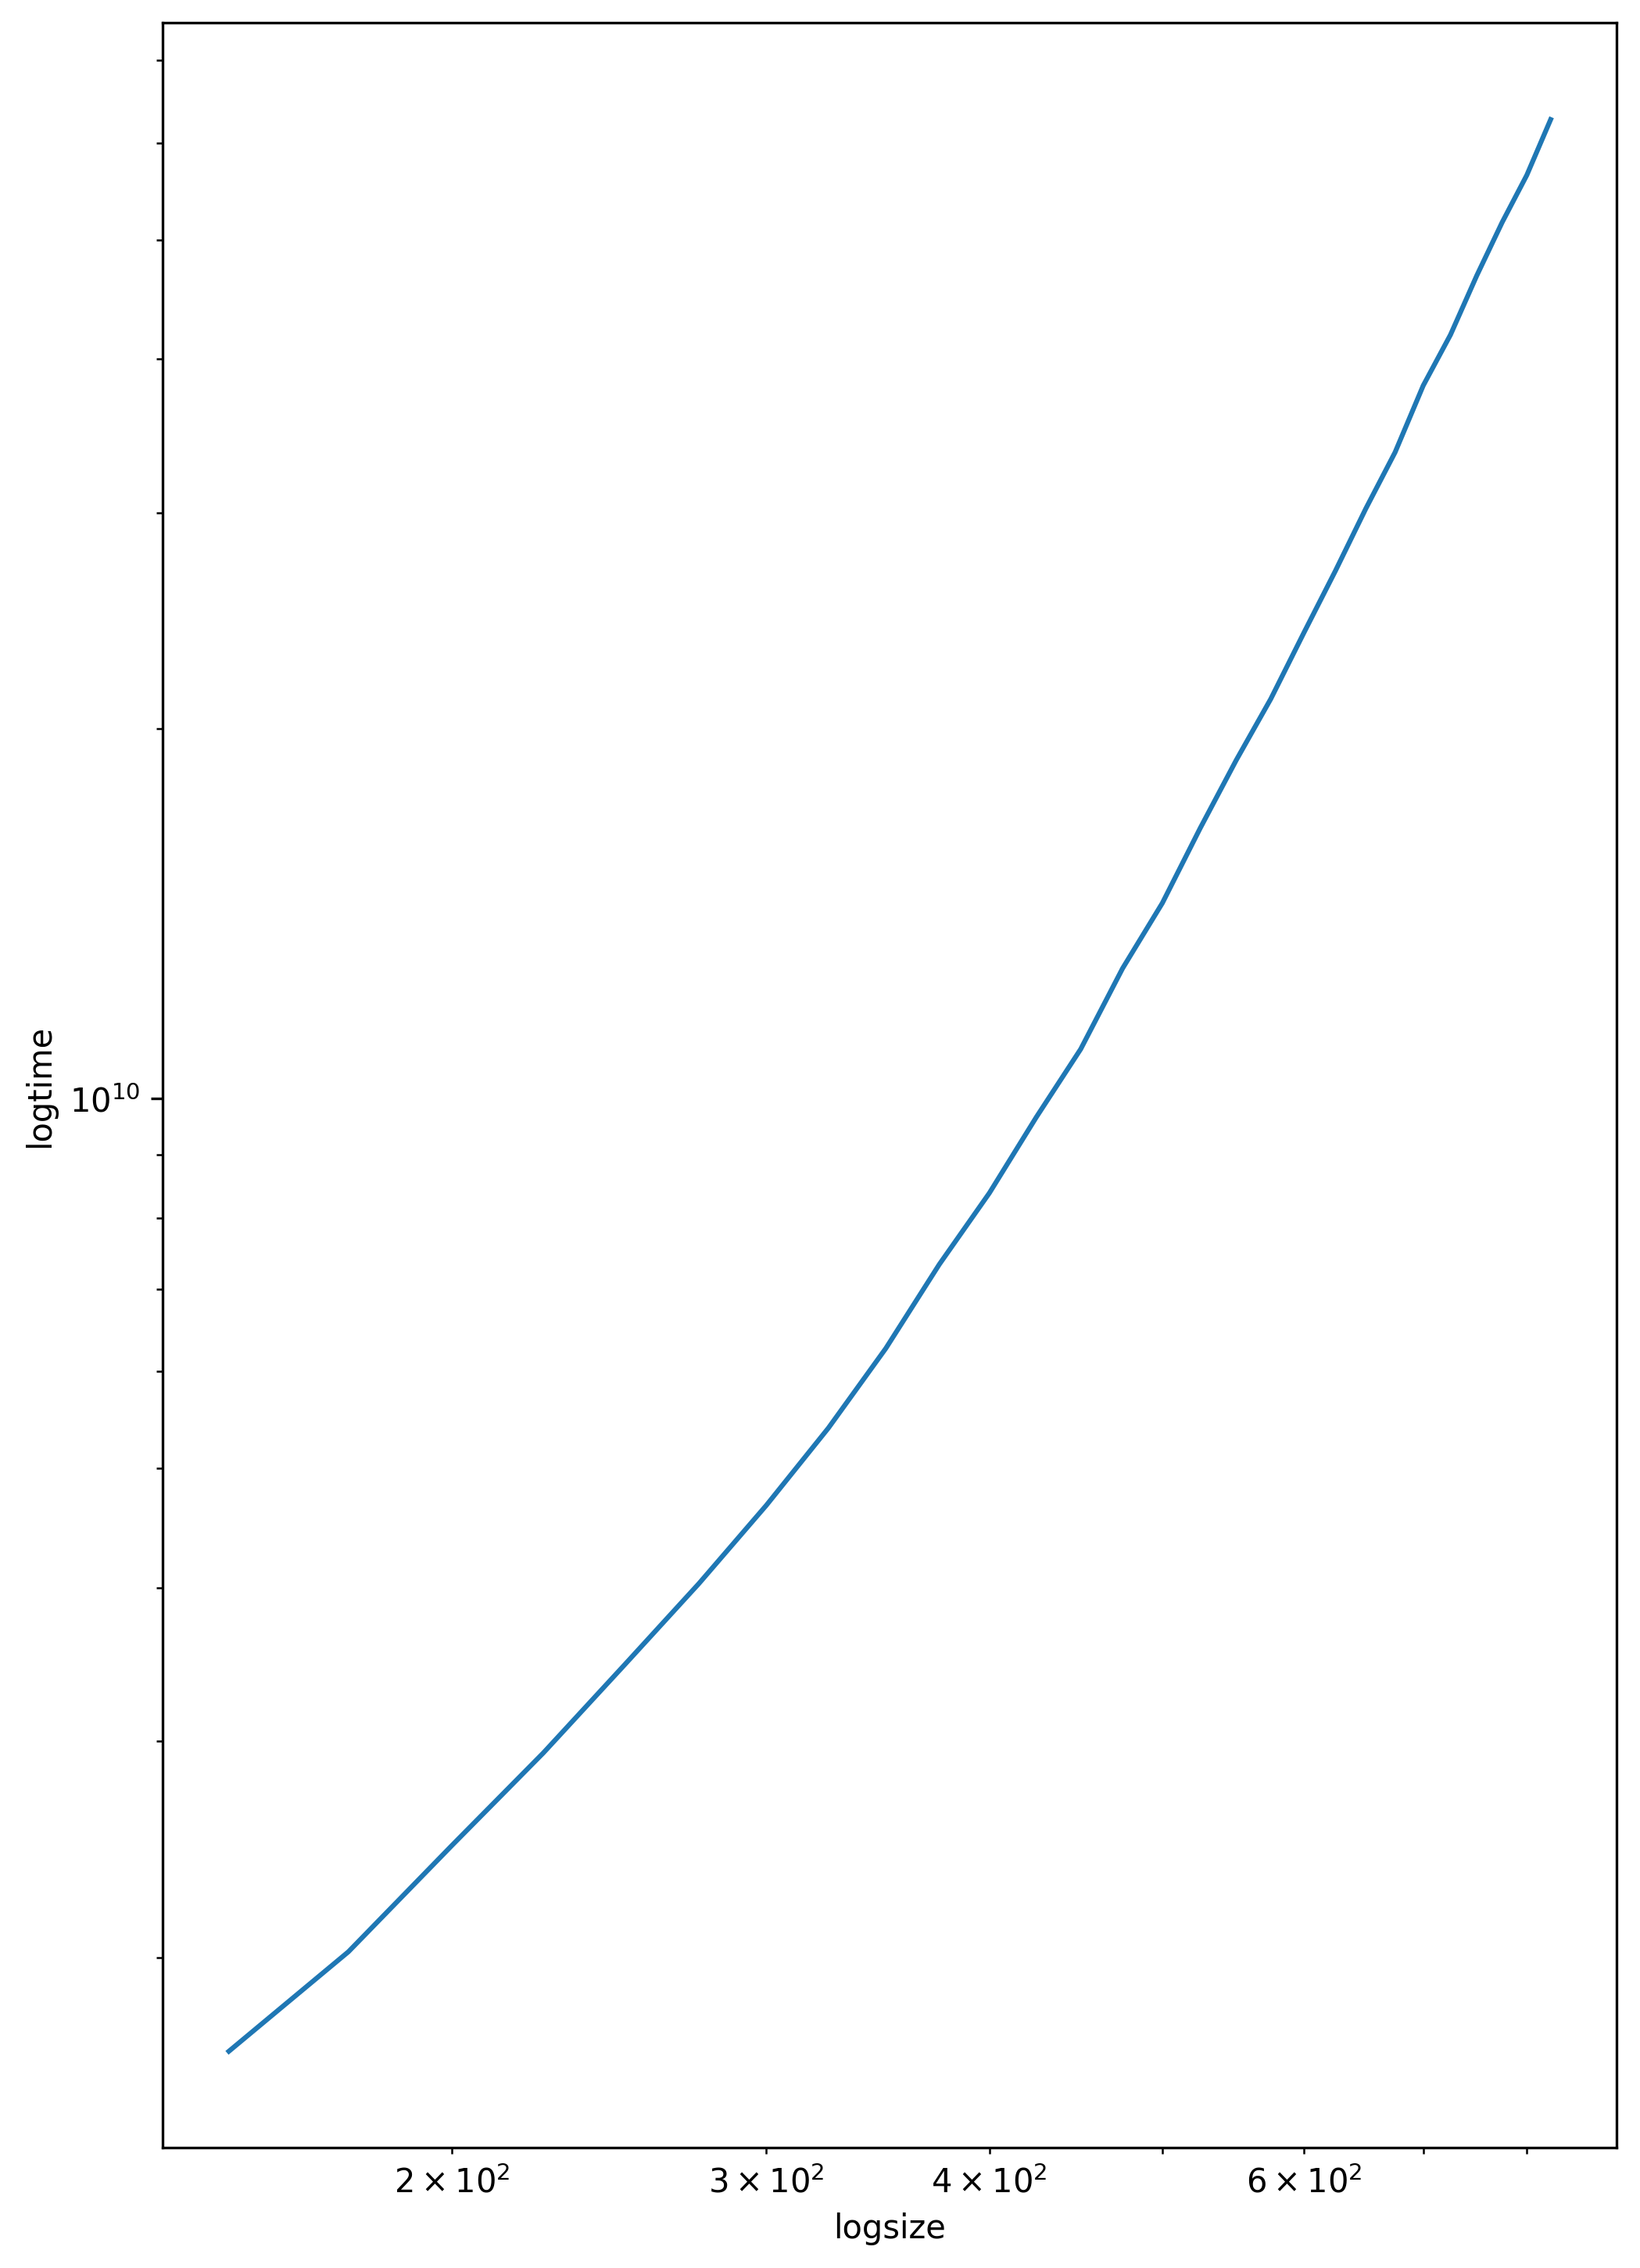

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12), dpi=300)
plt.xscale('log')
plt.yscale('log')

plt.ylabel('logtime')
plt.xlabel('logsize')

plt.plot(sizes, times)

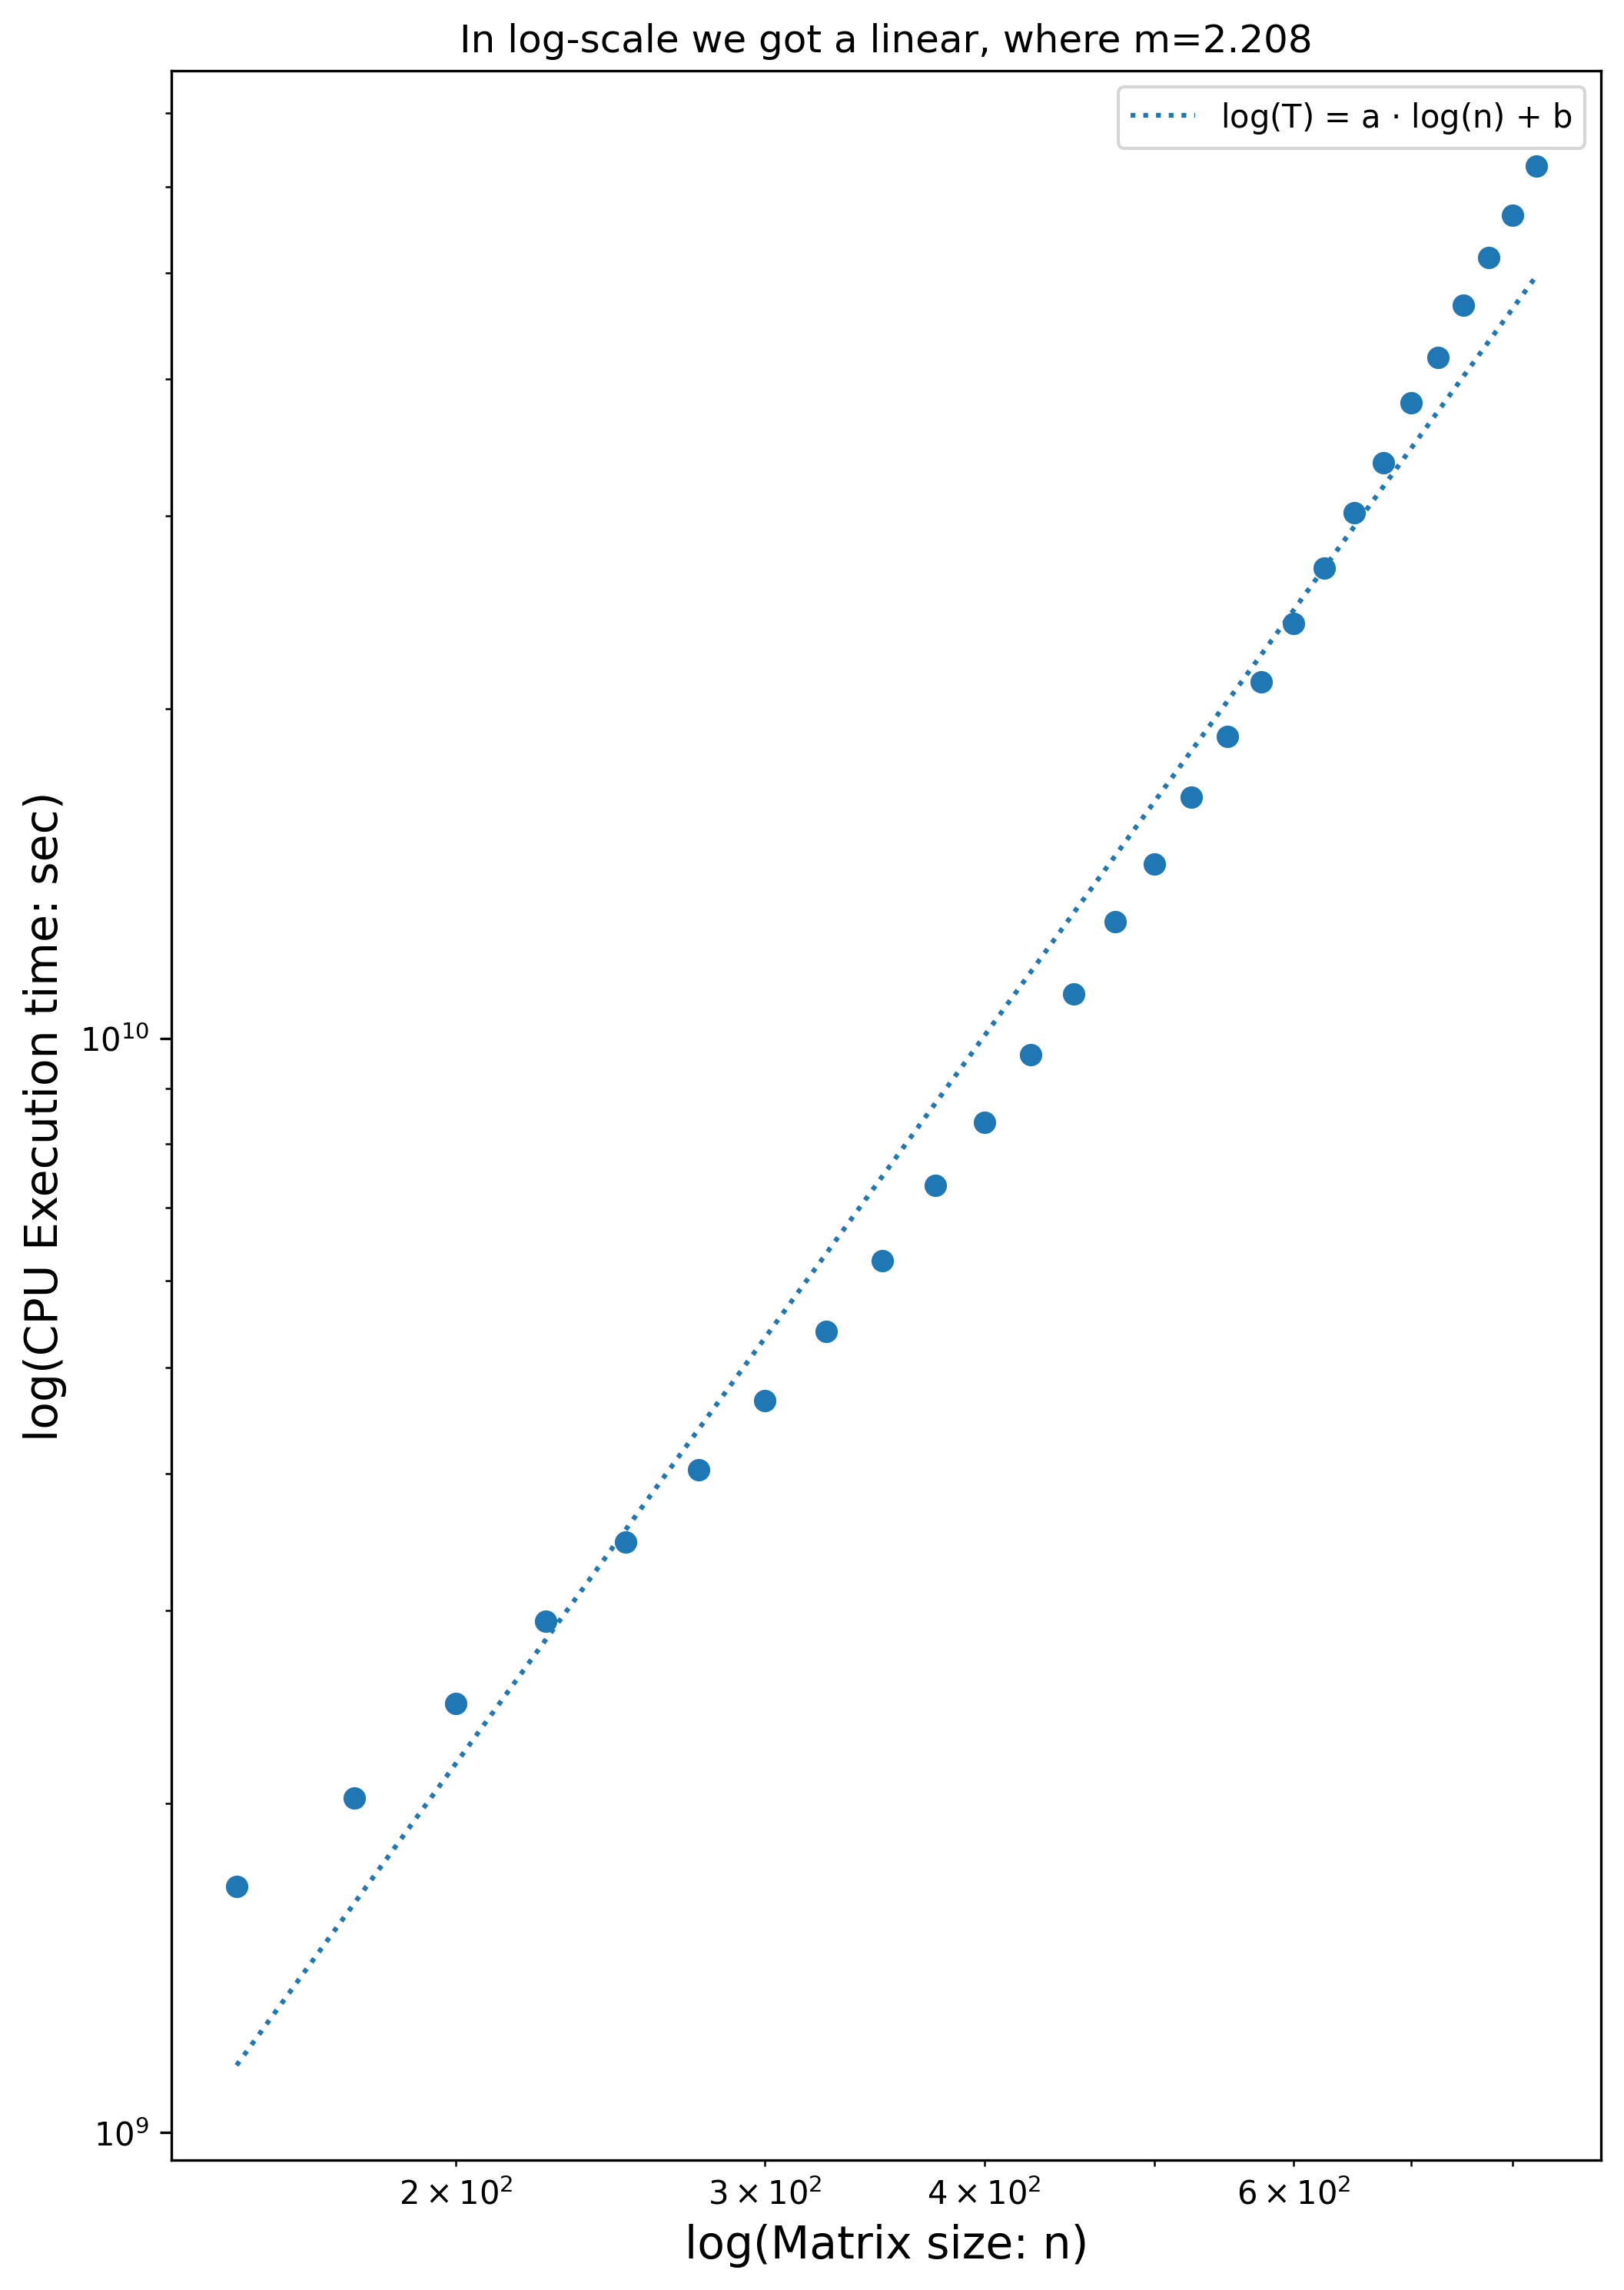

In [55]:
plt.figure(figsize=(8,12), dpi=300)
plt.scatter(sizes, times)

a, b = np.polyfit(np.log(sizes), np.log(times), 1) # fit log(y) = m*log(x) + c
y_fit = np.exp(a * np.log(sizes) + b) # calculate the fitted values of y 
plt.plot(sizes, y_fit, ':', label='log(T) = a $\cdot$ log(n) + b')

plt.xlabel("log(Matrix size: n)", fontsize=14)
plt.ylabel("log(CPU Execution time: sec)", fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.title(f'In log-scale we got a linear, where m={a:.3f}')
plt.legend();

In [ ]:
#check eigenvalues
A = np.random.randn(10, 10)
A = 0.5 * (A + A.T)
print('Test matrix: \n', A)
eig_vals, eig_vecs = np.linalg.eig(A)
n_iters = [10, 50, 100, 500, 1000]
results = {}
for iters in n_iters:
    results[iters] = np.diag(QR_algorithm(A, iters))

Test matrix: 
 [[-1.487 -0.811  0.665  1.107 -0.441  0.966 -0.697 -0.21   0.129  0.787]
 [-0.811 -1.725 -0.209 -1.211 -0.509 -1.274 -0.527  0.869  0.413  0.311]
 [ 0.665 -0.209 -0.14   0.319  1.065  0.233  0.329  0.164 -0.114  0.569]
 [ 1.107 -1.211  0.319  0.102 -0.308 -0.049 -0.282 -0.125 -0.108  0.037]
 [-0.441 -0.509  1.065 -0.308  0.284 -1.306  0.123  0.377 -0.04   0.563]
 [ 0.966 -1.274  0.233 -0.049 -1.306  0.951 -0.357  1.082  0.187 -1.088]
 [-0.697 -0.527  0.329 -0.282  0.123 -0.357  0.799 -0.077 -0.908  0.341]
 [-0.21   0.869  0.164 -0.125  0.377  1.082 -0.077  0.598 -0.965 -0.324]
 [ 0.129  0.413 -0.114 -0.108 -0.04   0.187 -0.908 -0.965 -0.005  0.044]
 [ 0.787  0.311  0.569  0.037  0.563 -1.088  0.341 -0.324  0.044 -0.008]]


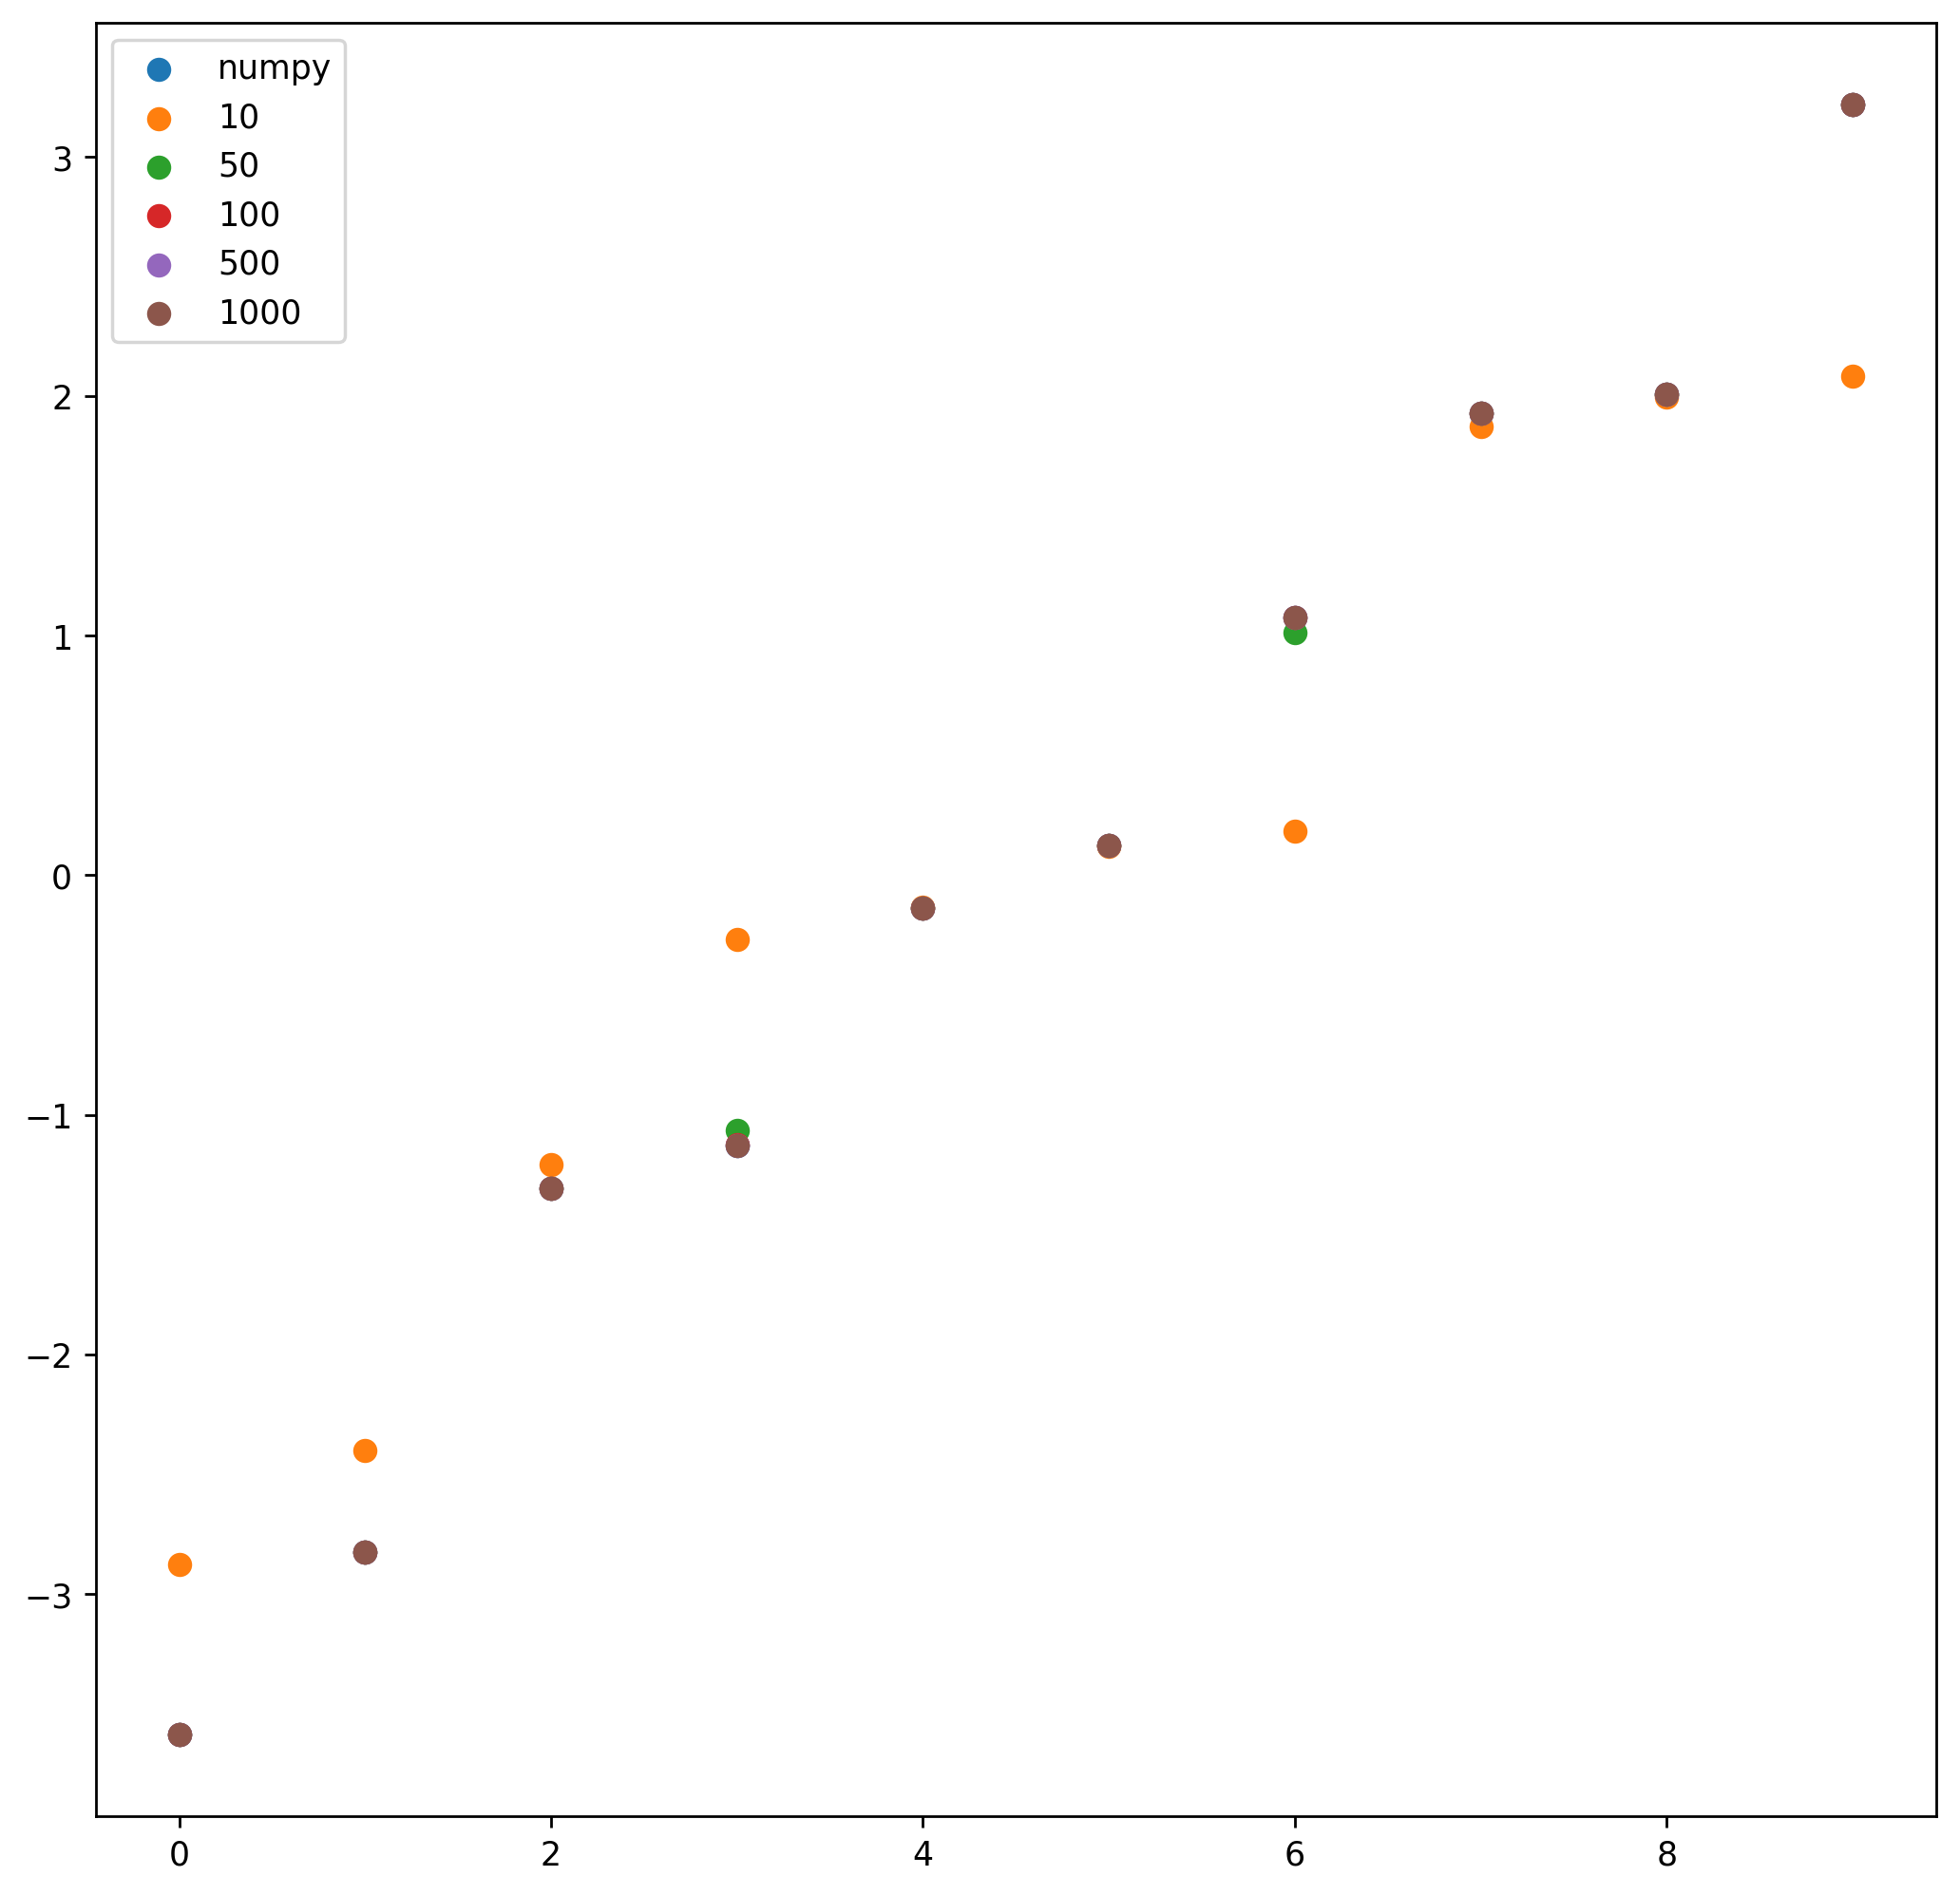

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=250)
ax1 = fig.add_subplot(111)
x = list(range(10))
ax1.scatter(x, sorted(eig_vals), s=40, label='numpy')
for n in results.keys():
    ax1.scatter(x, sorted(results[n]), s=40, label=str(n))
plt.legend(loc='upper left')

In [ ]:
for n in results.keys():
    print(f'Number of iterations is {n} and Max error is', np.abs(np.array(sorted(eig_vals)) - np.array(sorted(results[n]))).max())

Number of iterations is 10 and Max error is 1.1334849640090656
Number of iterations is 50 and Max error is 0.06323922323041242
Number of iterations is 100 and Max error is 0.0005851513858146085
Number of iterations is 500 and Max error is 9.992007221626409e-15
Number of iterations is 1000 and Max error is 9.992007221626409e-15


As expected the error decreases as we increase the number of iterations.

# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

$\DeclareMathOperator{\Tr}{Tr}$
$$u^TBu = \sum_{i, j} u_iu_jB_{ij}$$
$$ \mathbb{E}\left[u^\top B u\right] = \sum_{i,j} B_{ij} \mathbb{E}\left[u_i u_j \right]$$
Since $u_i$ are independent, if $i \neq j$ we have:
$$\mathbb{E}\left[u_i u_j \right] = \mathbb{E}\left[u_i \right] \mathbb{E}\left[u_j \right] = 0 $$
$$\mathbb{E}\left[u_i u_i \right] = \sigma^2 + \mathbb{E}\left[u_i \right]^2 = \sigma^2 $$
$$\mathbb{E}\left[u^\top B u\right] = \sum_{i} B_{ii} \sigma^2 = \sigma^2 \Tr B$$

2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

$$ 
\text{var}\left[u^\top B u\right] = \mathbb{E} \left[(u^\top B u)^2\right] - \mathbb{E} \left[u^\top B u\right]^2
$$
$$
(u^\top B u)^2 = \left(\sum_{ij} B_{ij} u_i u_j \right)\left(\sum_{kl} B_{kl} u_k u_l \right) = \sum_{i,j,k,l}B_{ij}B_{kl}u_i u_j u_k u_l 
$$
Once again due to independence and zero mean of $u_i$ only terms left will be of the form $u_i^4$ and $u_i^2u_j^2$:
$$
\mathbb{E} \left[(u^\top B u)^2\right] = \sum_i B_{ii}^2 \mathbb{E} \left[u_i^4\right] + \sum_{i \neq j} B_{ii}B_{jj} \mathbb{E} \left[u_i^2 u_j^2\right]  + \sum_{i\neq j} B_{ij}B_{ij} \mathbb{E} \left[u_i^2 u_j^2\right] + \sum_{i\neq j} B_{ij}B_{ji} \mathbb{E} \left[u_i^2 u_j^2\right] = \sum_i B_{ii}^2 \mathbb{E} \left[u_i^4\right] + 2\sum_{i\neq j} B_{ij}^2 \sigma^4 + \sum_{i \neq j} B_{ii}B_{jj} \sigma^4
$$
$$
\text{var}\left[u^\top B u\right] = \sum_i B_{ii}^2 \mathbb{E} \left[u_i^4\right] + \sum_{i\neq j} B_{ij}^2 \sigma^4 - \sigma^4 (\Tr B)^2
$$
$$
(\Tr B)^2 = \left( \sum_{i} B_{ii} \right)^2 = \sum_{i, j} B_{ii} B_{jj}
$$
$$
\text{var}\left[u^\top B u\right] = \sum_i B_{ii}^2 \mathbb{E} \left[u_i^4\right] + 2\sum_{i\neq j} B_{ij}^2 \sigma^4 + \sum_{i \neq j} B_{ii}B_{jj} \sigma^4 - \sigma^4 \sum_{i, j} B_{ii} B_{jj} = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2
$$

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;

  b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);

**a)**
$$
\mathbb{E}[u^4] = \int_{-\infty}^{\infty}\frac{u^4}{\sqrt{2\pi\sigma^2}}e^{-\frac{u^2}{2\sigma^2}}du = \bigg| t = \frac{u}{\sigma \sqrt{2}} \bigg| = \frac{4\sigma^4}{\sqrt{\pi}}\int_{-\infty}^{\infty}t^4e^{-t^2}dt
$$

$$
\int_{-\infty}^{\infty}t^4e^{-t^2}dt = -\frac{1}{2} \int_{-\infty}^{\infty}t^3de^{-t^2} = \frac{3}{2} \int_{-\infty}^{\infty}t^2e^{-t^2}dt = -\frac{3}{4} \int_{-\infty}^{\infty} t de^{-t^2} = \frac{3}{4}\int_{-\infty}^{\infty} e^{-t^2} dt = \frac{3}{4} \sqrt{\pi}
$$

$$
\mathbb{E}[u^4] = 3 \sigma^4
$$

$$
\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i, j} B_{i, j}^2 = 2\sigma^4 \| B \|_F^2
$$

**b)**
$$
\mathbb{E}[u^4] = \frac{1}{2} (\sigma^4 + (-\sigma)^4) = \sigma^4
$$
$$
\text{var}\left[u^\top B u\right] = 2 \sigma^4 \sum_{i \neq j} B_{ij}^2
$$

4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.

  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.

**a)**

$$
\mathbb{E}\left[\hat{\mu}\right] = \mathbb{E}\left[\frac{1}{N}\sum_{i = 1}^Nz_i\right] = \frac{1}{N}\sum_{i = 1}^N\mathbb{E}\left[z_i\right] = \mu
$$

$$
\text{var}[\hat{\mu}] = \mathbb{E}\left[\hat{\mu}^2\right] - \mathbb{E}\left[\hat{\mu}\right]^2 = \mathbb{E}\left[\hat{\mu}^2\right] - \mu^2
$$

$$
\mathbb{E}\left[\hat{\mu}^2\right] = \frac{1}{N^2}\sum_{i, j}\mathbb{E}\left[z_iz_j\right] = \frac{1}{N^2} \left( \sum_{i}\mathbb{E}\left[z_i^2\right] + \sum_{i\neq j}\mathbb{E}\left[z_iz_j\right] \right)
$$

$\text{var}[z_i] = \sigma^2 = \mathbb{E}[z_i^2] - \mathbb{E}[z_i]^2 = \mathbb{E}[z_i^2] - \mu^2$ <br>
If $i \neq j$ $\rightarrow$ $\mathbb{E}\left[z_iz_j\right] = \mathbb{E}\left[z_i\right]\mathbb{E}\left[z_j\right] = \mu^2$

$$
\mathbb{E}\left[\hat{\mu}^2\right] = \frac{1}{N^2} \left( N(\sigma^2 + \mu^2) + N(N - 1) \mu^2 \right) = \frac{\sigma^2}{N} + \mu^2
$$

$$
\text{var}[\hat{\mu}] = \mathbb{E}\left[\hat{\mu}^2\right] - \mu^2 = \frac{\sigma^2}{N}
$$

**b**

$$
\mathbb{P}(|\hat \mu - \mu| \geq k\frac{\sigma}{\sqrt{N}}) \leq \frac{1}{k^2}
$$

$$
\begin{cases}
k\frac{\sigma}{\sqrt{N}} = \epsilon \\
\frac{1}{k^2} = \delta
\end{cases} \Rightarrow N = \frac{1}{\delta} \left( \frac{\sigma}{\epsilon} \right)^2
$$

5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.

  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.

  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

$$H_N = \frac{1}{N}\sum_{i=1}^Nu_i^TBu_i$$

$$
\mathbb{E}[u_1^TBu_1] = \sigma^2 \text{Tr}(B)
$$

$$
\text{var}[u_1^TBu_1] = 2\sigma^4\sum_{i\neq j}B_{ij}^2+\left(\mathbb{E}[u^4]-\sigma^4\right)\sum_{i}B_{ii}^2
$$

Gaussian:

$$
\text{var}[H_N] = 2\sigma^4\|B\|_F^2
$$
$$
\mathbb{P}(|H_N - \sigma^2\text{Tr}(B)| \geq \varepsilon\text{Tr}(B)) \leq  \delta
$$

$$
N_G = \frac{2\|B\|_F^2}{\delta\varepsilon^2\text{Tr}^2(B)}
$$

Rademacher:

$$
\text{var}[H_N] = 2\sigma^4\sum_{i \neq j}B_{ij}^2
$$

$$
N_R = \frac{2\sum_{i \neq j}B_{ij}^2}{\delta\varepsilon^2\text{Tr}^2(B)}
$$

**Subproblem 2 (5 pts)**

  1. Implement Hutchinson algorithm for normal and Rademacher distributions.

In [ ]:
def hutch(mat, N, mode='normal'):
    trace = 0
    for i in range(N):
        if mode == 'normal':
            u = np.random.normal(0, 1, size=(mat.shape[0], 1))
        elif mode == 'Rademacher':
            u = (np.random.rand(mat.shape[0], 1) > 0.5) * 2 - 1
        else:
            print('Unknown mode')
            return -1
        
        trace += np.dot(u.T, np.dot(mat, u))
    return trace[0, 0] / N

2. Evaluate your algorithm on several matrices on your choice.

In [ ]:
M = np.random.rand(100, 100)
for _ in range(5):
    print('True', np.trace(M), 'Normal', hutch(M, 80), 'Radenacher', hutch(M, 80, mode='Rademacher'))

True 52.93674168686303 Normal 51.697736565970764 Radenacher 54.566612597692576
True 52.93674168686303 Normal 43.74404852001532 Radenacher 52.57629338561297
True 52.93674168686303 Normal 57.56525843088705 Radenacher 52.81365212084431
True 52.93674168686303 Normal 58.492529315023305 Radenacher 67.92738814245851
True 52.93674168686303 Normal 43.77210414997614 Radenacher 49.436977196344294


In [ ]:
M = np.random.rand(100, 100)
M = M - M.T
for _ in range(5):
    print('True', np.trace(M), 'Normal', hutch(M, 80), 'Radenacher', hutch(M, 80, mode='Rademacher'))

True 0.0 Normal 1.5917822615563182e-15 Radenacher 1.3988810110276972e-15
True 0.0 Normal 5.814793091474257e-16 Radenacher -6.966649479522858e-16
True 0.0 Normal -4.538036613155328e-16 Radenacher 3.4514058278034552e-15
True 0.0 Normal 1.3322676295501878e-16 Radenacher 8.715250743307478e-16
True 0.0 Normal -1.2587153541687713e-15 Radenacher -1.7458257062230586e-15


**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

$$u^TAu = \sum_{i, j} A_{ij}u_i u_j = \sum_{i, j} u_i u_j = \left( \sum_i u_i \right) \left( \sum_j u_j \right) $$
$$U = \sum_i u_i \sim \mathcal{N}(0, N)$$
$$\frac{u^T A u}{N} = \frac{U}{\sqrt{N}} \frac{U}{\sqrt{N}}$$
$$\frac{U}{\sqrt{N}} \sim \mathcal{N}(0, 1) \Rightarrow \frac{u^T A u}{N} \sim \chi^2$$

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

$$\sum_{i=1}^M\frac{u_i^TAu_i}{N} = \sum_{i=1}^MU_i^2 \overset{U_i\sim\mathcal{N}(0, 1)} {=}\chi^2(M)$$

3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{M}u_i^\top A u_i \big/ M$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

$$ 
\mathbb{E} [G_M] = \frac{M}{N} \Tr(A) = M \quad \text{var}[G_M] = \frac{2\|A\|^2_F M}{N^2} = 2M
$$
<br>
$$
\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) = \text{Pr}\left(\left|G_{M} - N\right| \leq \epsilon N\right) =\int_{(1-\varepsilon)N}^{(1+\varepsilon)N}\frac{1}{\sqrt{4\pi M}}\exp\left(-\frac{(x-M)^2}{4M}\right)dx
$$
Consider $u = \frac{x - M}{2\sqrt{M}}$, $du = \frac{dx}{2\sqrt{M}}$
$$
\int_{(1-\varepsilon)N}^{(1+\varepsilon)N}\frac{1}{\sqrt{4\pi M}}\exp\left(-\frac{(x-M)^2}{4M}\right) = \int_{\frac{N - M - \varepsilon N}{2\sqrt{M}}}^{\frac{N - M + \varepsilon N}{2\sqrt{M}}} \frac{1}{\sqrt{\pi}} \exp(-u^2)du
$$

$$
\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta \Leftrightarrow 1 - \delta \leq \int_{\frac{N - M - \varepsilon N}{2\sqrt{M}}}^{\frac{N - M + \varepsilon N}{2\sqrt{M}}} \frac{1}{\sqrt{\pi}} \exp(-u^2)du
$$
$$
\delta \geq 1 - \int_{\frac{N - M - \varepsilon N}{2\sqrt{M}}}^{\frac{N - M + \varepsilon N}{2\sqrt{M}}} \frac{1}{\sqrt{\pi}} \exp(-u^2)du = 1 - \text{erf}\left(\frac{N - M + \varepsilon N}{2\sqrt{M}}\right) + \text{erf}\left(\frac{N - M - \varepsilon N}{2\sqrt{M}}\right)
$$


It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.

---



$$(I - QQ^T)A (I - QQ^T) = A - QQ^TA - AQQ^T + QQ^TAQQ^T$$
$$
\Tr \left(Q^T A Q\right) + \Tr \left((I - QQ^T)A (I - QQ^T)\right) = \Tr(QQ^TA) + \Tr(A) - 2\Tr(QQ^TA) + \Tr(QQ^TAQQ^T) = \Tr(A) + (\Tr(QQ^TAQQ^T) - \Tr(QQ^TA))
$$
For any symmetric matrix $\rightarrow$ eigenvectors corresponding to different eigenvalues are orthogonal to each other. Vectors corresponding to the same eigenvalue can be made orthogonal to each other. If we also normalize every vector in $Q$ we will get an orthogonal matrix $\Rightarrow$ $Q^TQ = I$.
$$\Tr(QQ^TAQQ^T) = \Tr(Q^TAQQ^TQ) = \Tr(Q^TAQ) = \Tr(QQ^TA) \Rightarrow$$
$$\Rightarrow \Tr \left(Q^T A Q\right) + \Tr \left((I - QQ^T)A (I - QQ^T)\right) = \Tr A$$

2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

A is psd $\Rightarrow$ $\exists S: A = SDS^T$. Where $D$ is diagonal matrix and columns of $S$ are eigenvectors of $A$. Denote $D_k$ = $\text{diag}(\lambda_{N - k + 1}, \ldots, \lambda_N)$.
$$ AQ = QD_k$$
$$
\|(I- QQ^T)A(I- QQ^T)\|_F^2=\Tr((I- QQ^T)A(I- QQ^T)(I- QQ^T)A(I- QQ^T))= $$
$$= \Tr(A(I- QQ^T)(I- QQ^T)A(I- QQ^T)(I- QQ^T)) =\Tr(A(I- QQ^T)A(I - QQ^T)) = \|A(I - QQ^T)\|^2_F =$$ 
$$ = \|A - QD_kQ^T\|^2_F = \|A - A_k\|^2_F = \| \sum_{i = 1}^{N-k} \lambda_i v_i v_i^T \|_F^2 = \sum_{i,j = 1}^{N - k} \Tr (\lambda_i \lambda_j v_iv_i^T v_j v_j^T) \overset{v_iv_j = \delta_{ij}}{=} \sum_{i=1}^{N - k} \lambda_i^2
$$
$$0 < \lambda_1 \leq \ldots \leq \lambda_N \Rightarrow \lambda_{N - k} \leq \frac{1}{k} \sum_{N - k}^N \lambda_i \leq \frac{1}{k} \Tr A$$

$$
\|A - A_k\|_F^2=\sum_{i =1}^{N-k}\lambda_i^2\leq \lambda_{N - k}\sum_{i=1}^{N-k}\lambda_i\leq\frac{1}{k}\text{Tr}(A)\sum_{i=1}^{N-k}\lambda_i\leq \frac{1}{k}\text{Tr}^2(A)
$$

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

$$\exists S: A = SDS^T, \quad D = \text{diag}(\lambda_1, \ldots, \lambda_n)$$
$$\|A\|_F = \sqrt{\Tr(A^TA} = \sqrt{\Tr(SD^TSS^TDS)} = \sqrt{\Tr(D^2)} = \sqrt{\sum_{i=1}^N \lambda_i^2}$$
For arbitrary postivie numbers $\lambda_i \rightarrow \left(\sum_{i}\lambda_i\right)^2 \geq \sum_{i}\lambda_i^2$.
$$\|A\|_F = \sqrt{\sum_{i=1}^N \lambda_i^2} \leq \sum_{i}\lambda_i = \Tr(A)$$ 

4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

$$\Tr \left(A\right) = \Tr \left(Q^T A Q\right) + \Tr \left((I - QQ^T)A (I - QQ^T)\right)$$

First trace requires $k = \frac{1}{\epsilon}$ operations. <br>
For $A_l = \Tr \left((I - QQ^T)A (I - QQ^T)\right)$
$$ \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\frac{\Tr(A)}{\sqrt{lk}}\right) \geq \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\log(1/\delta)}\left\|A_l \right\|_{F}\right) \geq 1 - \delta$$
$l = \frac{1}{\epsilon}$ steps ensures we get:
$$ 1 - \delta \leq \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\log(1/\delta)} \epsilon \Tr(A) \right) $$
So both terms can be computed in $\simeq \frac{1}{\epsilon}$ operations

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

2. Evaluate you algorithm on several matrices on your choice.

In [ ]:
def hutch_imp(A, m):
    Q = np.random.normal(A.shape[0], m // 3)
    Q, _ = np.linalg.qr(np.dot(A, Q))
    tr_1 = np.trace(Q.T @ A @ Q)
    tr_2 = hutch((np.eye(A.shape[0]) - Q @ Q.T) @ A @ (np.eye(A.shape[0]) - Q @ Q.T), m // 3)
    return tr_1 + tr_2

In [ ]:
m = np.random.rand(100, 100)
for i in range(10):
    print(hutch_imp(m, 10), np.trace(m))

44.538582477230236 44.53858247723024
44.53858247723024 44.53858247723024
44.53858247723023 44.53858247723024
44.53858247723025 44.53858247723024
44.538582477230214 44.53858247723024
44.53858247723022 44.53858247723024
44.53858247723022 44.53858247723024
44.53858247723025 44.53858247723024
44.53858247723026 44.53858247723024
44.53858247723024 44.53858247723024


In [ ]:
m = np.random.rand(100, 100)
for i in range(10):
    print(hutch_imp(m, 10), np.trace(m))

54.82309844861547 54.82309844861546
54.82309844861546 54.82309844861546
54.823098448615475 54.82309844861546
54.82309844861547 54.82309844861546
54.823098448615475 54.82309844861546
54.82309844861548 54.82309844861546
54.82309844861547 54.82309844861546
54.823098448615475 54.82309844861546
54.82309844861547 54.82309844861546
54.82309844861548 54.82309844861546


## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choise. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

In [ ]:
from tqdm.notebook import tqdm


M = np.random.randn(1000, 1000)
tr = np.trace(M)
error, error_impr = [], []
for steps in tqdm(range(10, 500, 10)):
    tr_hutch = hutch(M, steps)
    tr_hutch_impr = hutch(M, steps)
    error += [np.abs((tr_hutch - tr) / tr)]
    error_impr += [np.abs((tr_hutch_impr - tr) / tr)]
    

  0%|          | 0/49 [00:00<?, ?it/s]

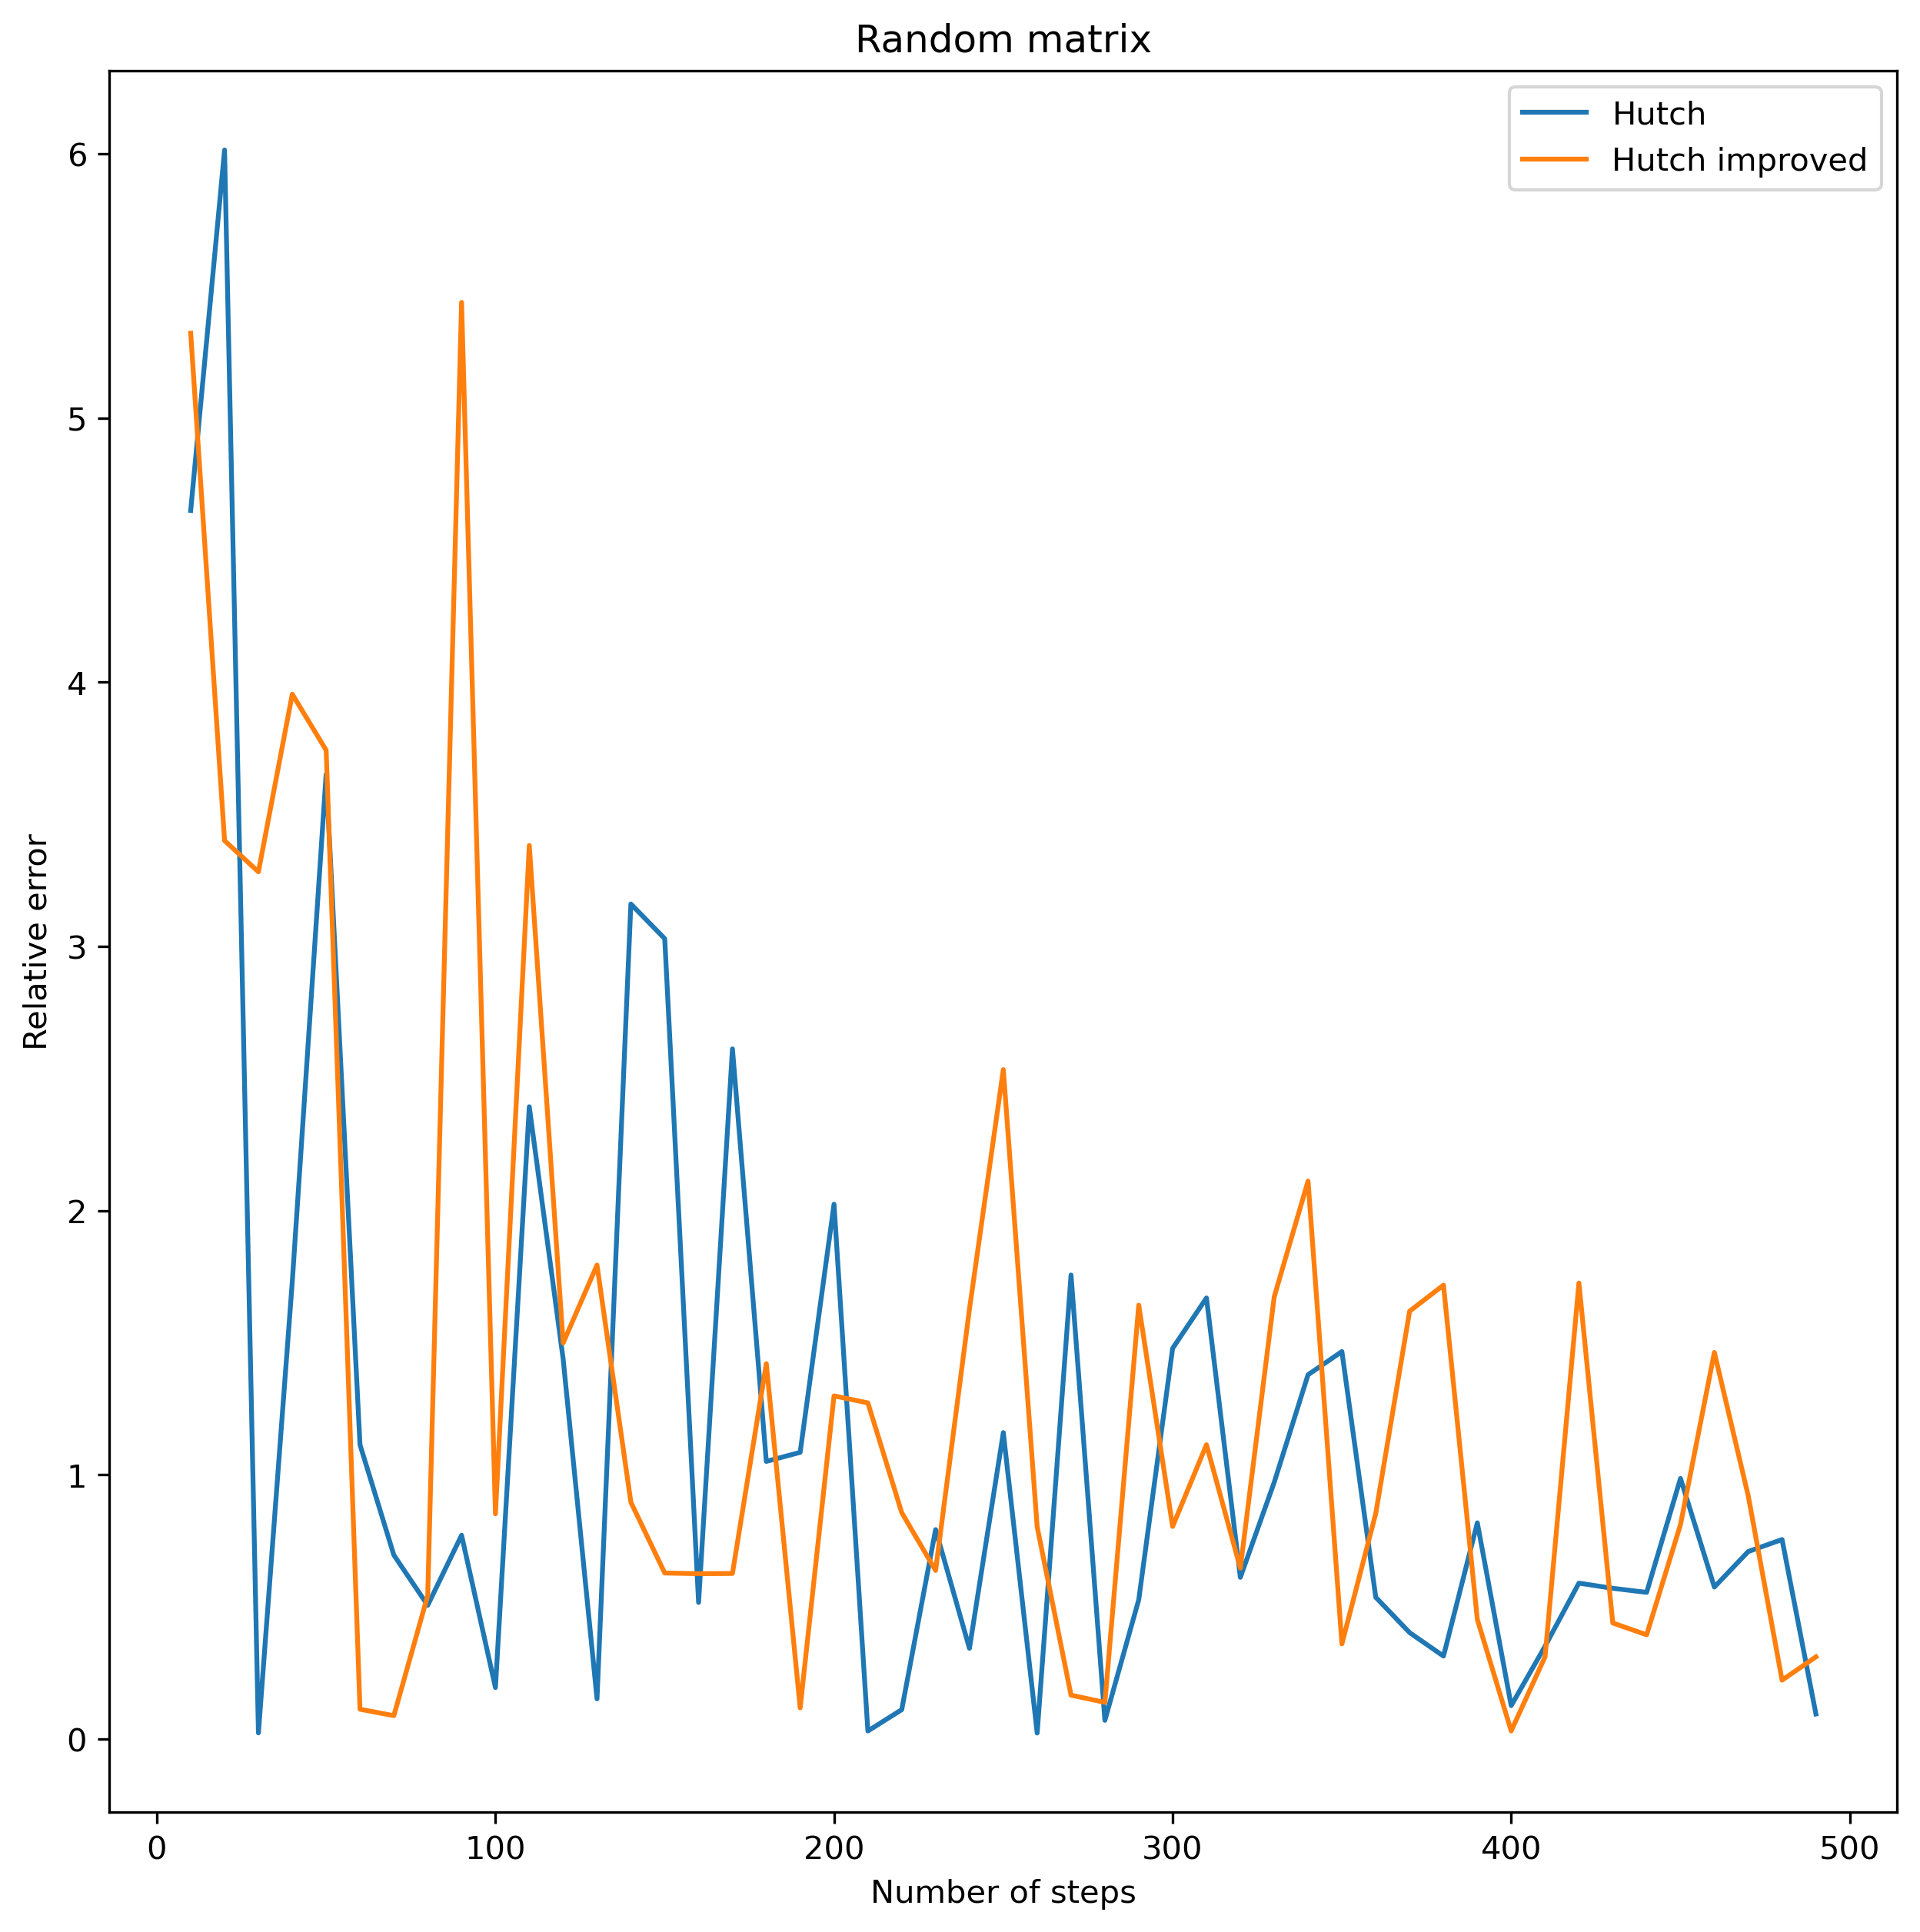

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10), dpi=300)
plt.ylabel('Relative error')
plt.xlabel('Number of steps')

plt.plot(np.arange(10, 500, 10), error, label = 'Hutch')
plt.plot(np.arange(10, 500, 10), error_impr, label='Hutch improved')

plt.title('Random matrix')
plt.legend()

In [ ]:
from scipy import sparse

M = sparse.random(1000, 1000, density = 0.05).toarray()
tr = np.trace(M)
error, error_impr = [], []
for steps in tqdm(range(10, 500, 10)):
    tr_hutch = hutch(M, steps)
    tr_hutch_impr = hutch(M, steps)
    error += [np.abs((tr_hutch - tr) / tr)]
    error_impr += [np.abs((tr_hutch_impr - tr) / tr)]

  0%|          | 0/49 [00:00<?, ?it/s]

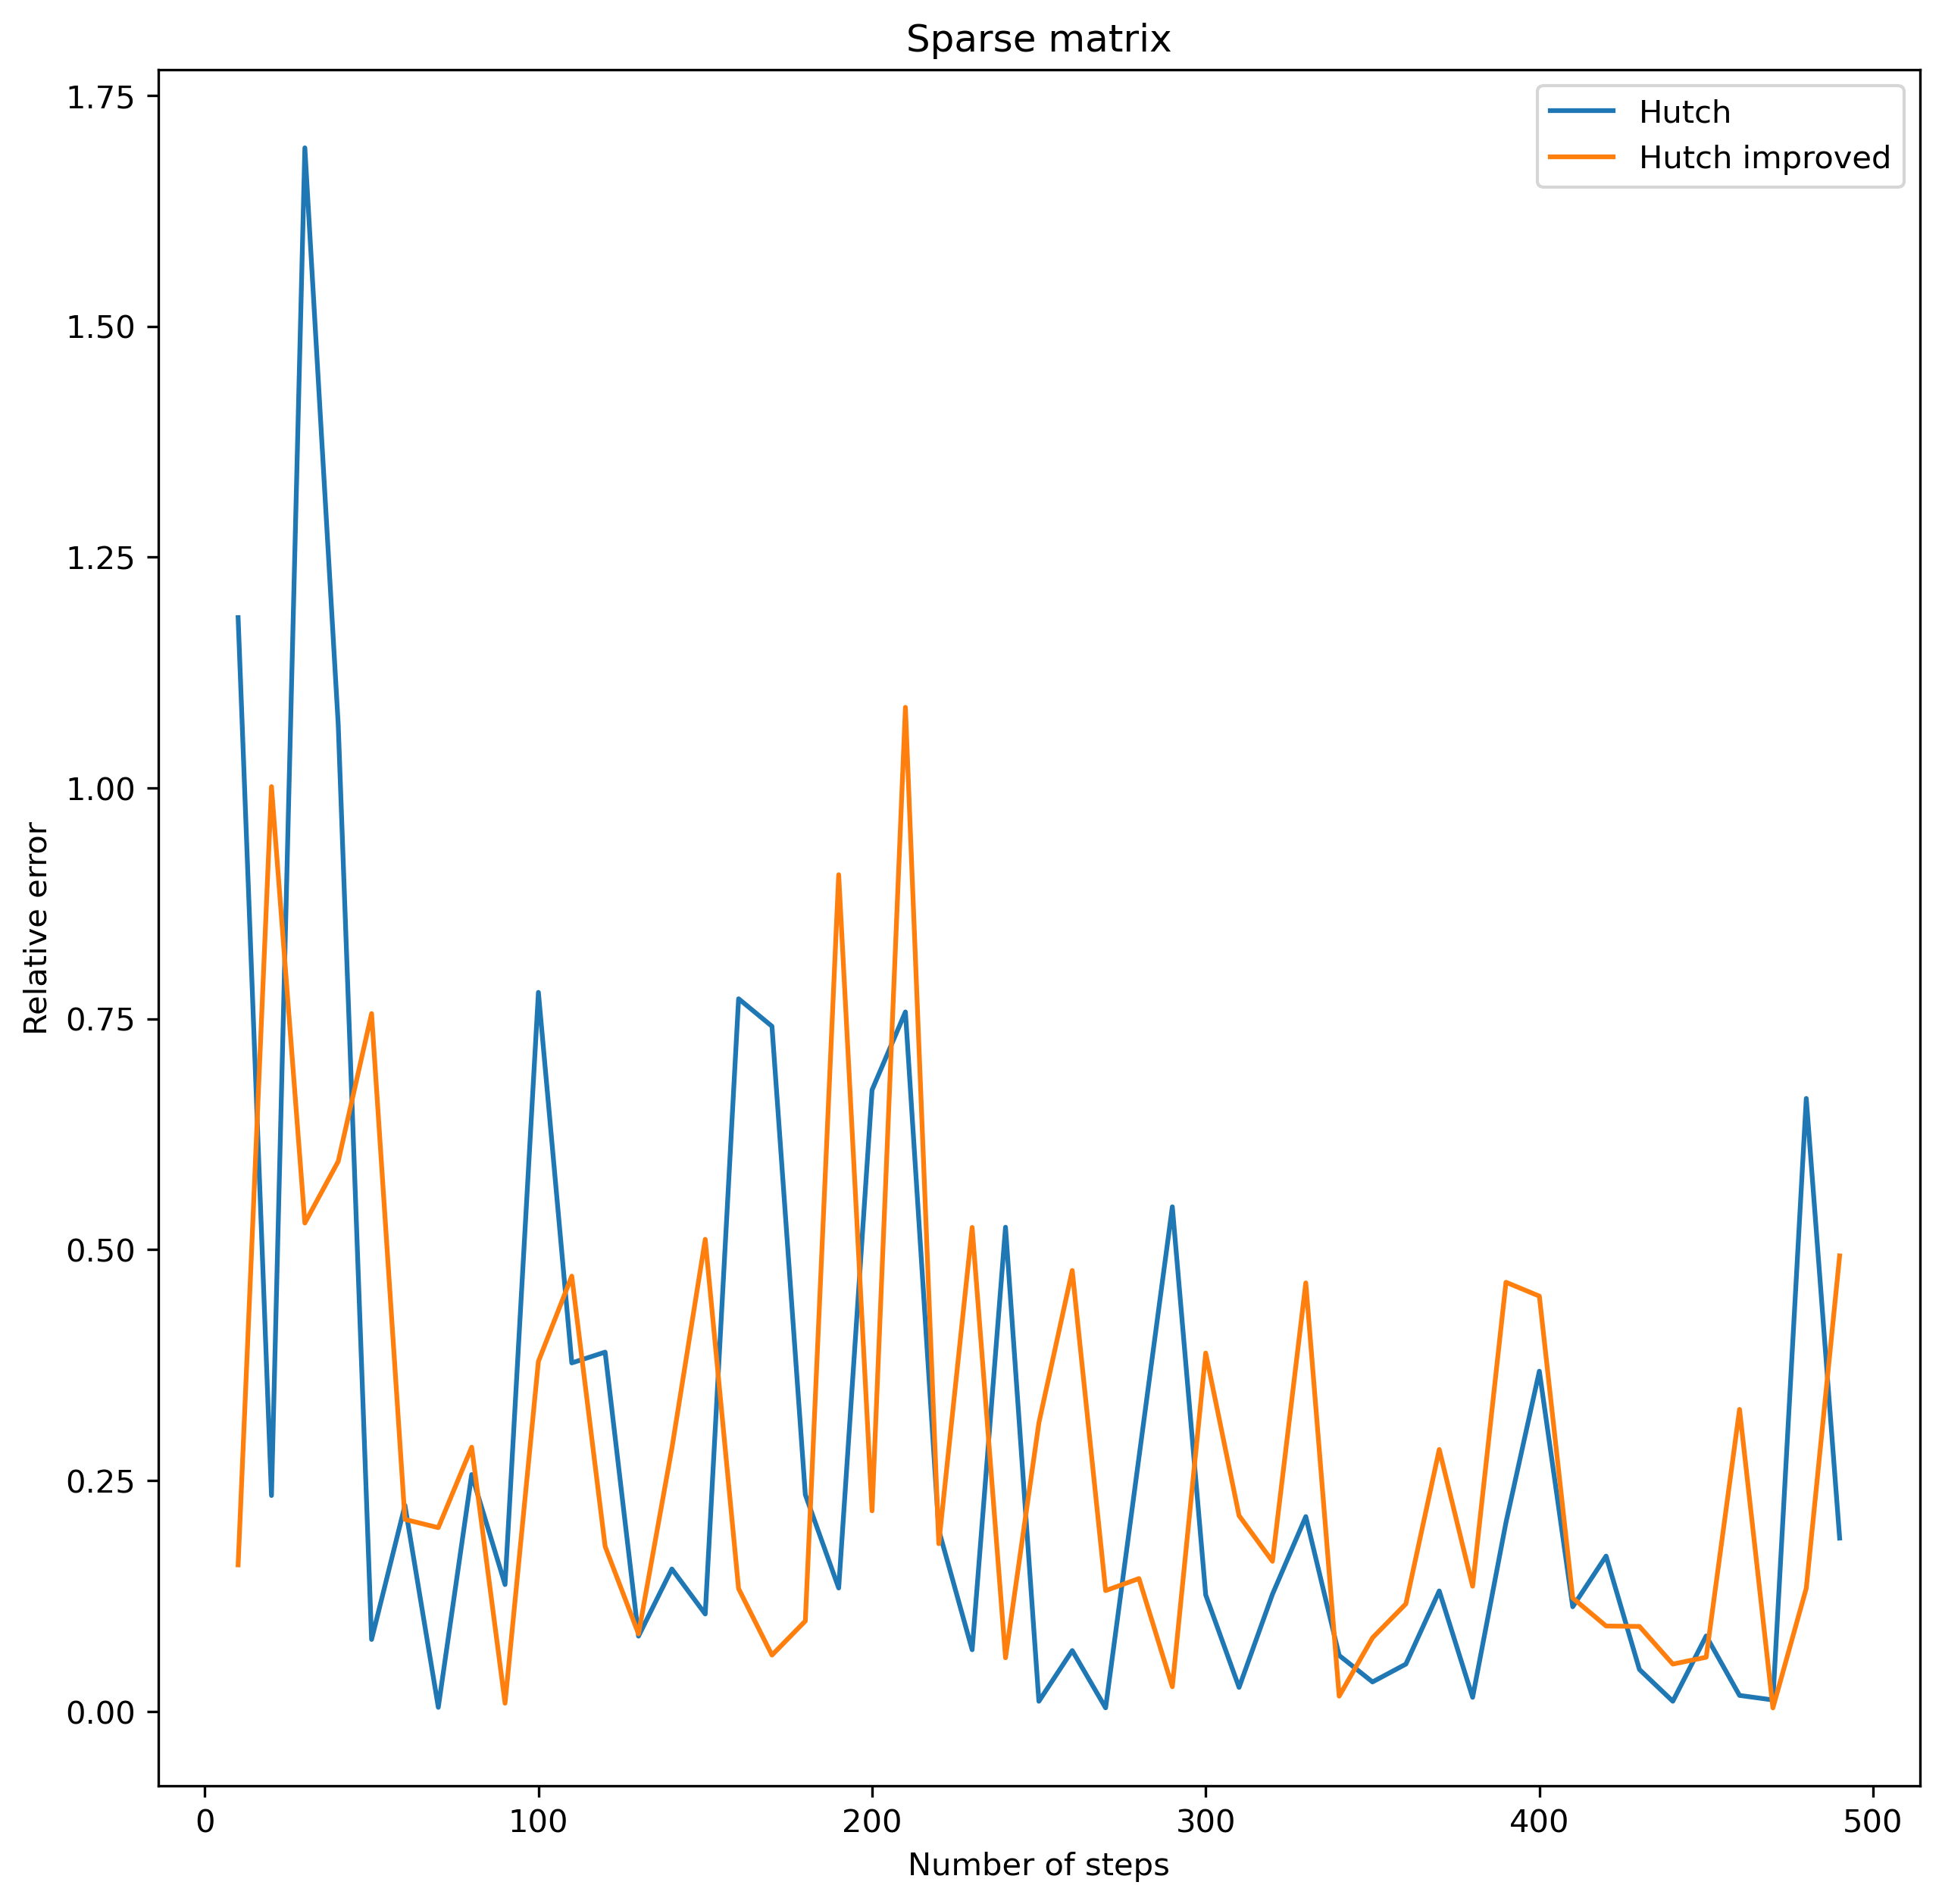

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10), dpi=300)
plt.ylabel('Relative error')
plt.xlabel('Number of steps')

plt.plot(np.arange(10, 500, 10), error, label = 'Hutch')
plt.plot(np.arange(10, 500, 10), error_impr, label='Hutch improved')

plt.title('Sparse matrix')
plt.legend()

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

In [ ]:
#alpha = -1
eigenvalues = np.linspace(1, 1000, 1000) ** -1.0
diag = np.diag(eigenvalues)
A = np.random.randn(1000, 1000)
Q, R = np.linalg.qr(A)
M = Q.T @ diag @ Q
tr = np.trace(M)
error, error_impr = [], []
for steps in tqdm(range(10, 500, 10)):
    tr_hutch = hutch(M, steps)
    tr_hutch_impr = hutch(M, steps)
    error += [np.abs((tr_hutch - tr) / tr)]
    error_impr += [np.abs((tr_hutch_impr - tr) / tr)]

  0%|          | 0/49 [00:00<?, ?it/s]

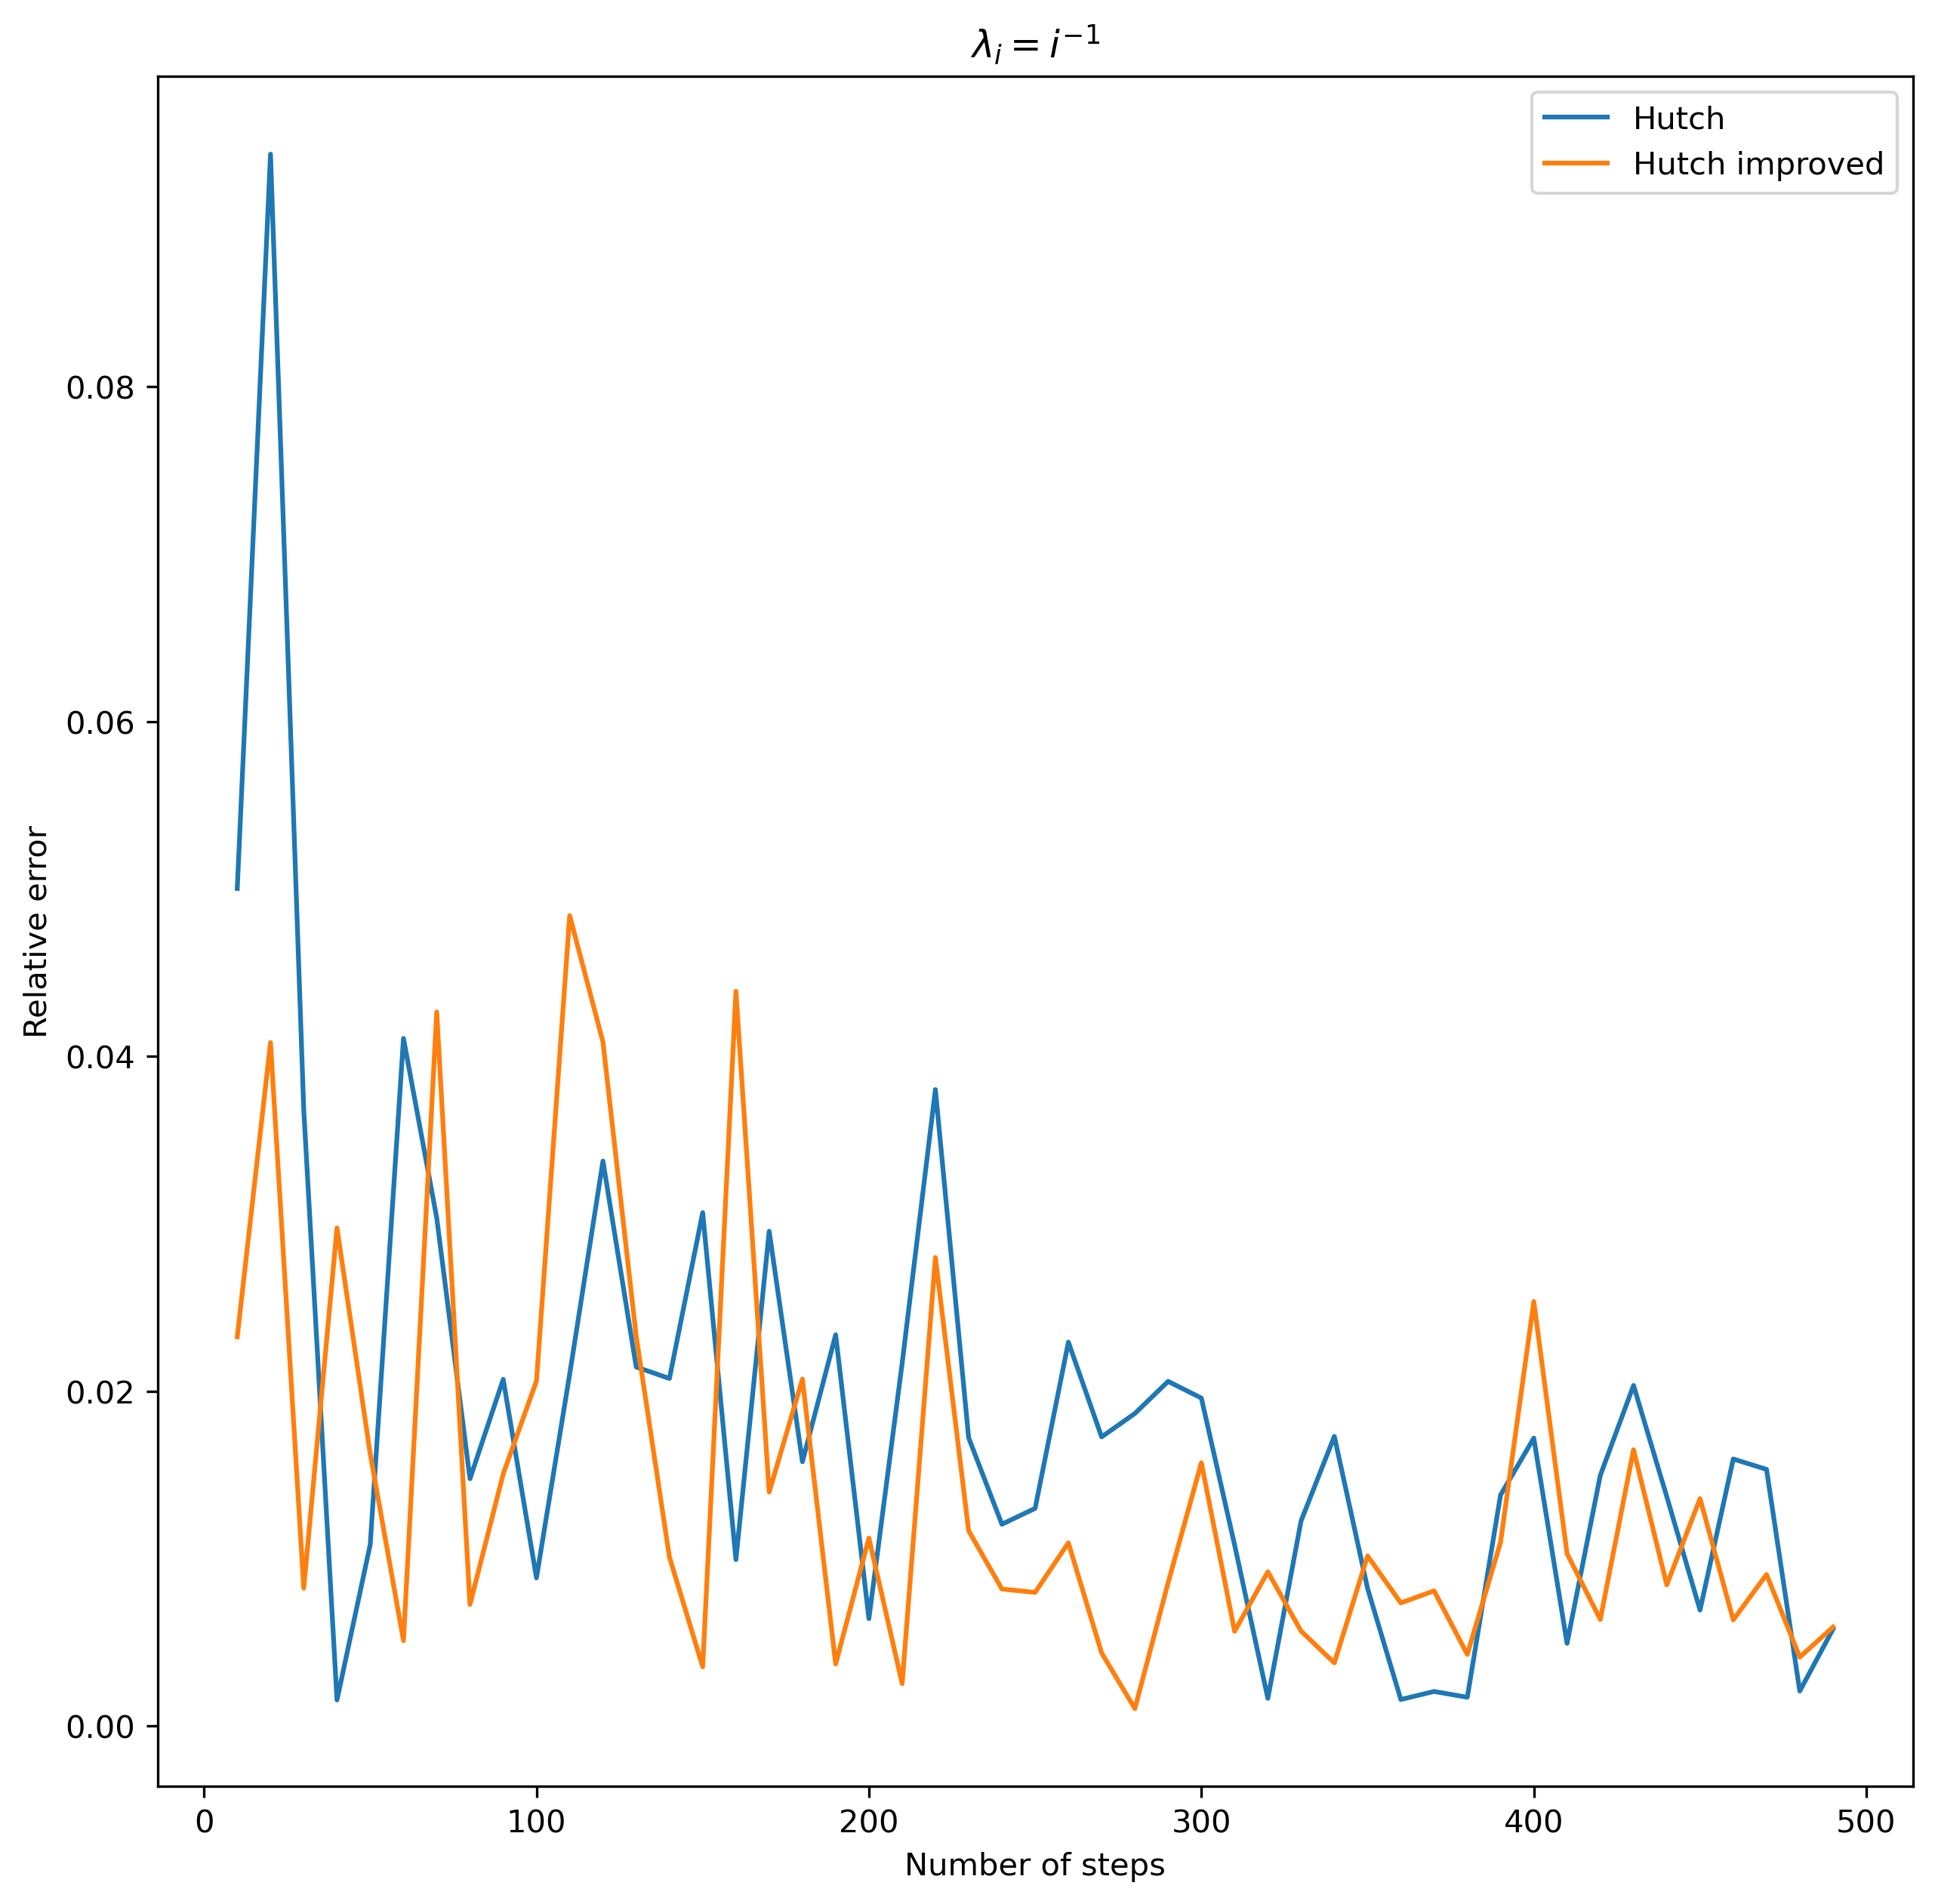

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10), dpi=300)
plt.ylabel('Relative error')
plt.xlabel('Number of steps')

plt.plot(np.arange(10, 500, 10), error, label = 'Hutch')
plt.plot(np.arange(10, 500, 10), error_impr, label='Hutch improved')

plt.title('$\lambda_i = i^{-1}$')
plt.legend()

In [ ]:
#alpha = -5
eigenvalues = np.linspace(1, 1000, 1000) ** -5
diag = np.diag(eigenvalues)
A = np.random.randn(1000, 1000)
Q, R = np.linalg.qr(A)
M = Q.T @ diag @ Q
tr = np.trace(M)
error, error_impr = [], []
for steps in tqdm(range(10, 500, 10)):
    tr_hutch = hutch(M, steps)
    tr_hutch_impr = hutch(M, steps)
    error += [np.abs((tr_hutch - tr) / tr)]
    error_impr += [np.abs((tr_hutch_impr - tr) / tr)]

  0%|          | 0/49 [00:00<?, ?it/s]

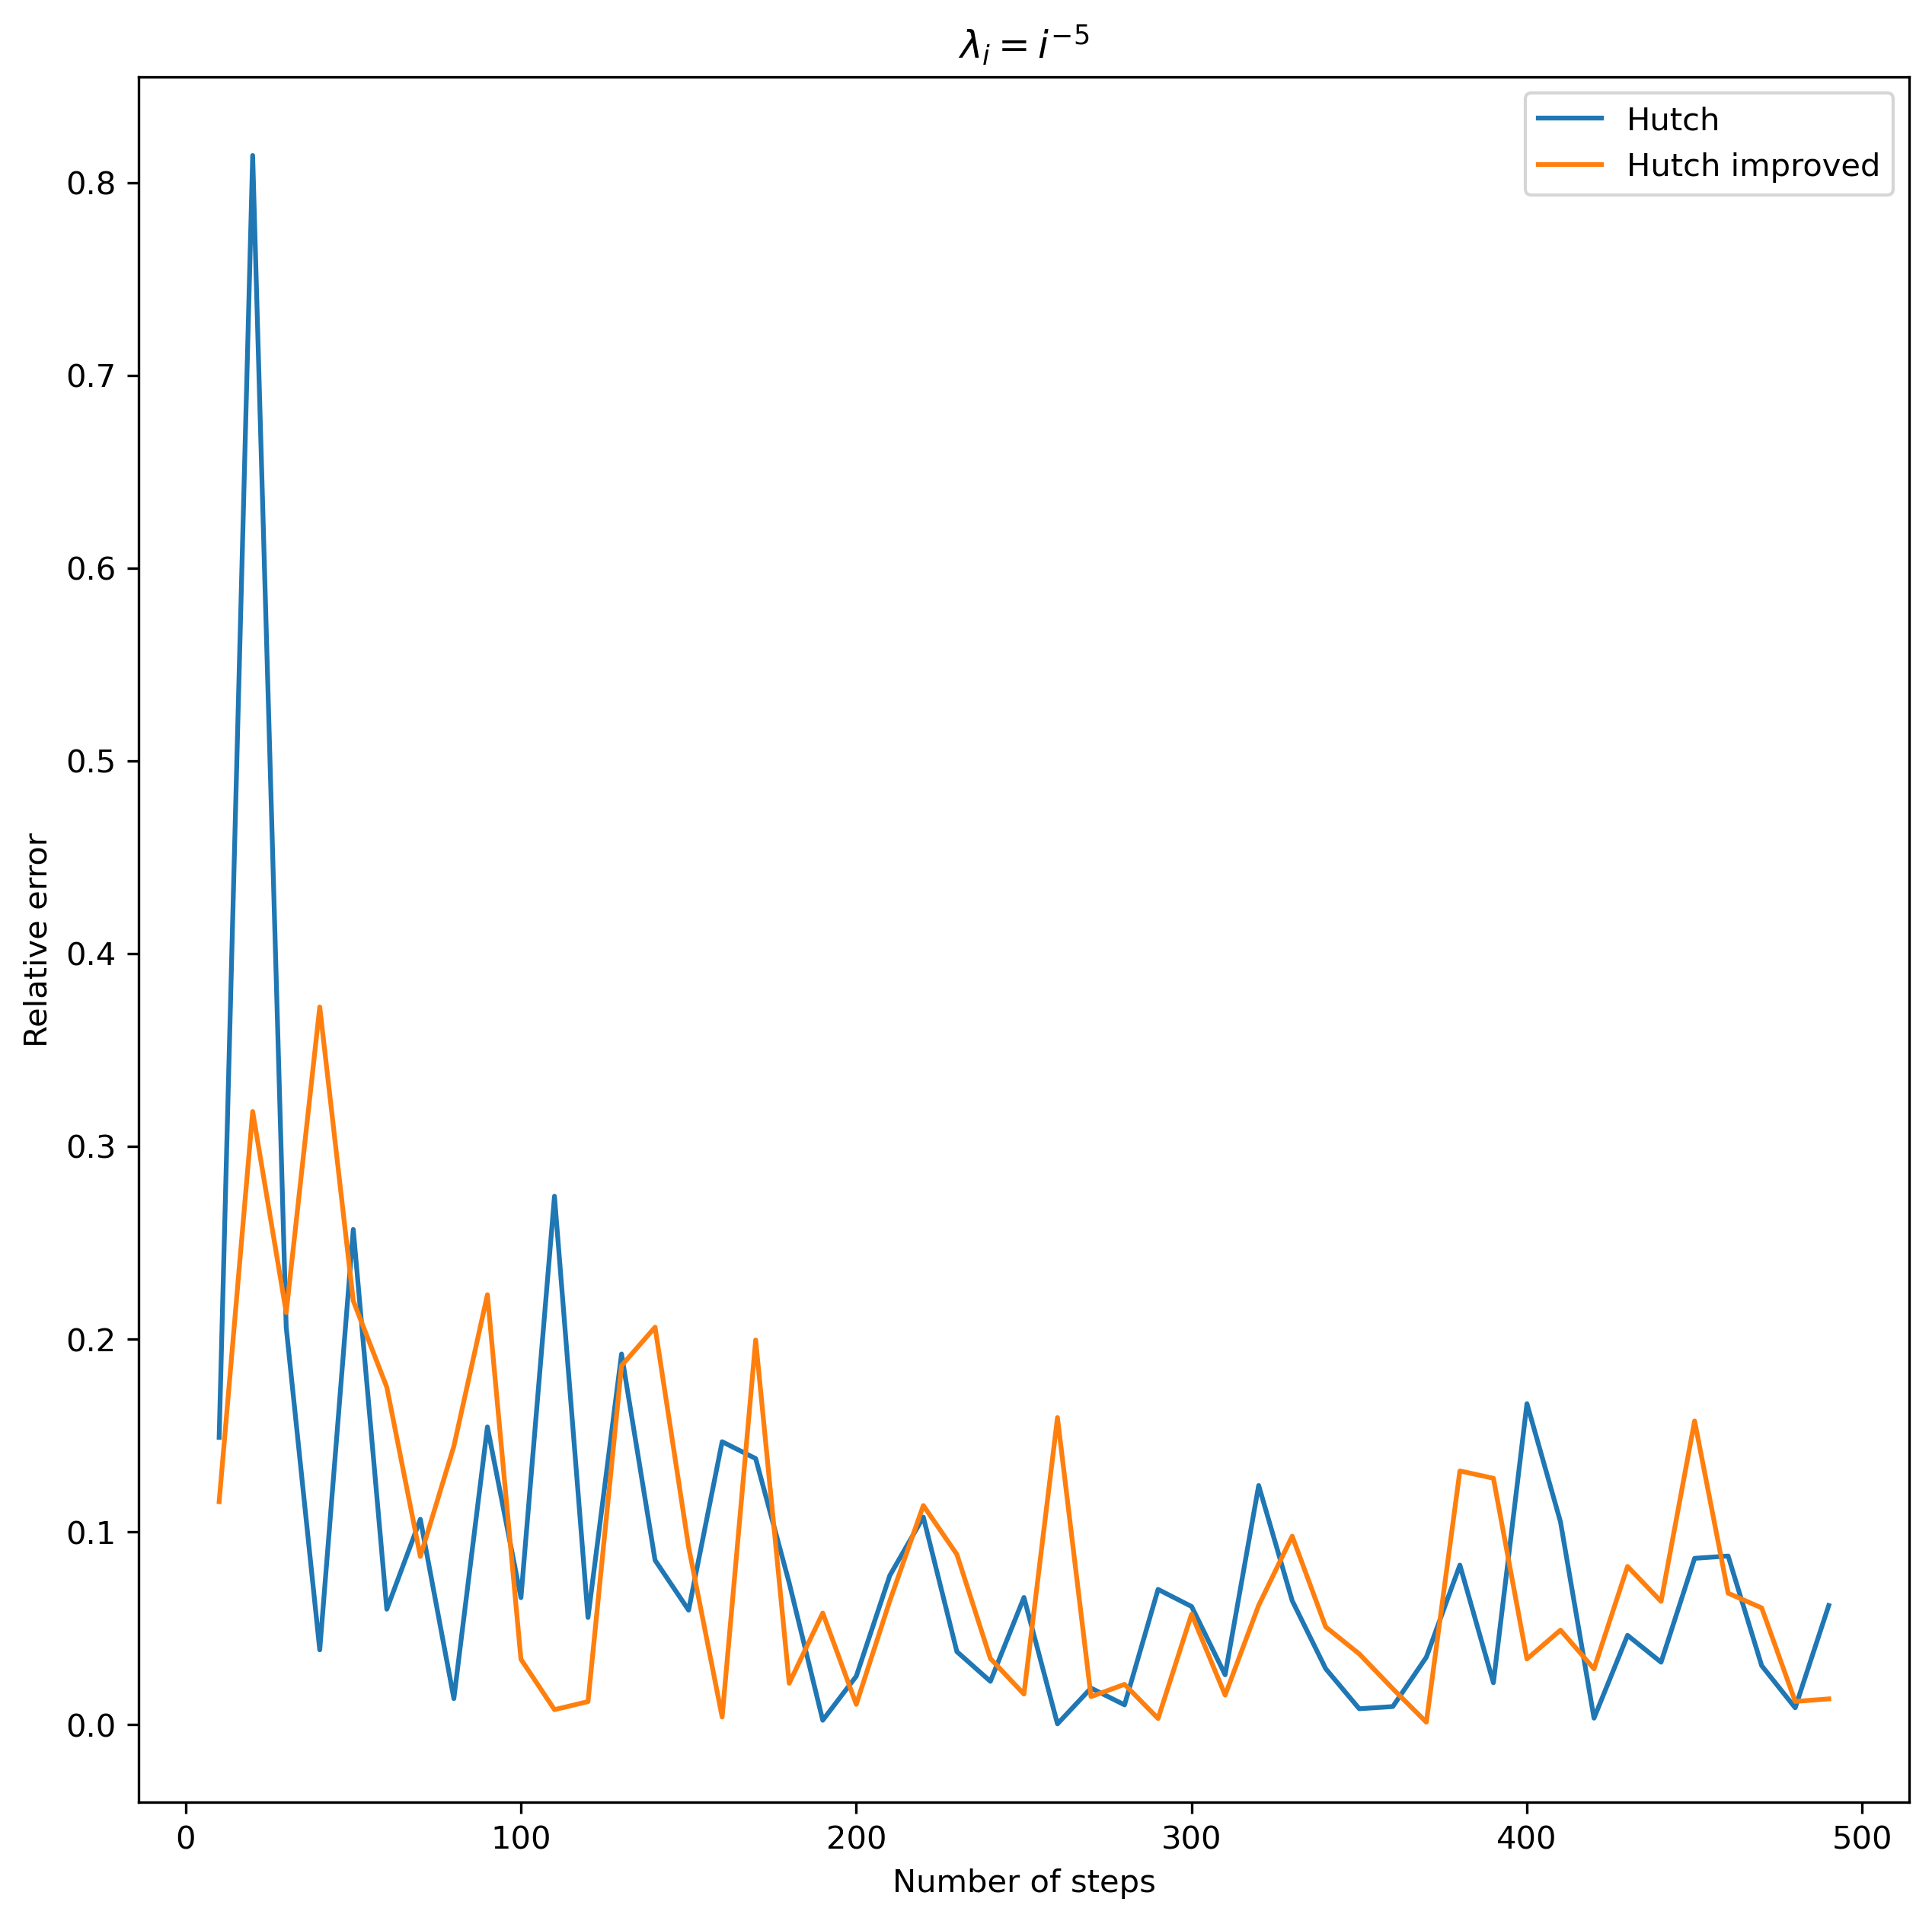

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10), dpi=300)
plt.ylabel('Relative error')
plt.xlabel('Number of steps')

plt.plot(np.arange(10, 500, 10), error, label = 'Hutch')
plt.plot(np.arange(10, 500, 10), error_impr, label='Hutch improved')

plt.title('$\lambda_i = i^{-5}$')
plt.legend()

In [ ]:
#alpha = -10
eigenvalues = np.linspace(1, 1000, 1000) ** -10
diag = np.diag(eigenvalues)
A = np.random.randn(1000, 1000)
Q, R = np.linalg.qr(A)
M = Q.T @ diag @ Q
tr = np.trace(M)
error, error_impr = [], []
for steps in tqdm(range(10, 500, 10)):
    tr_hutch = hutch(M, steps)
    tr_hutch_impr = hutch(M, steps)
    error += [np.abs((tr_hutch - tr) / tr)]
    error_impr += [np.abs((tr_hutch_impr - tr) / tr)]

  0%|          | 0/49 [00:00<?, ?it/s]

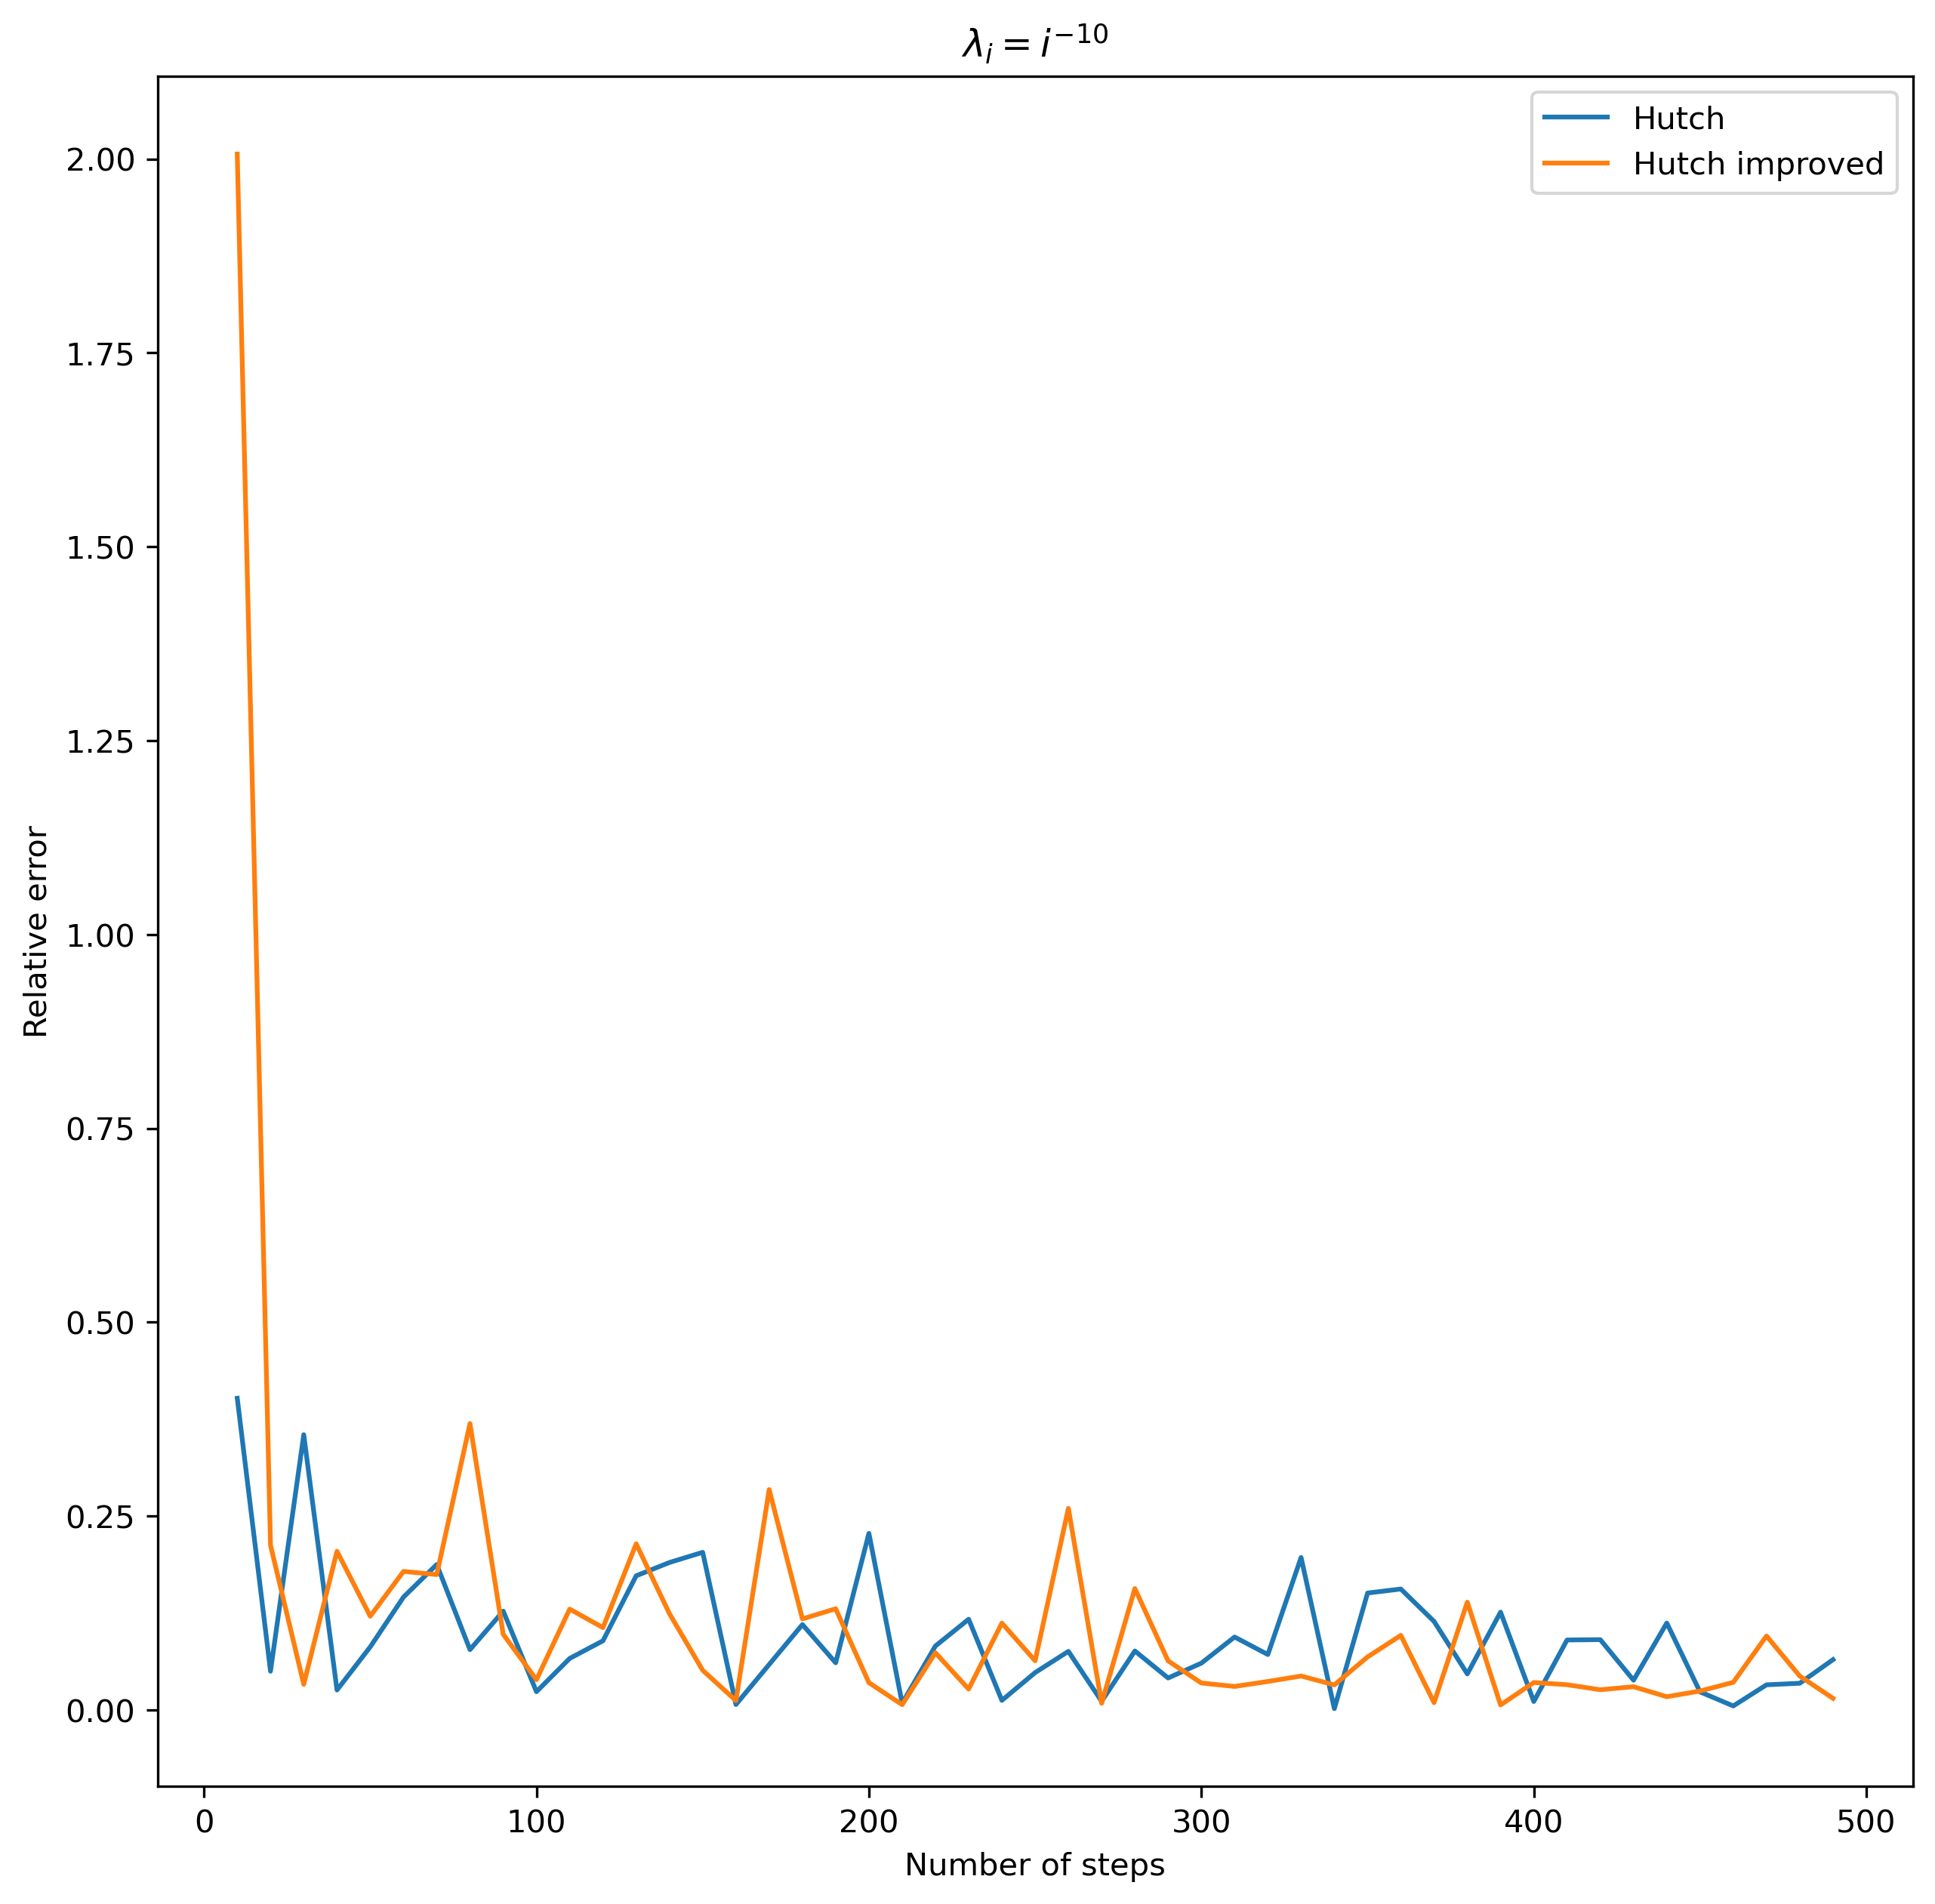

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=300)
plt.ylabel('Relative error')
plt.xlabel('Number of steps')

plt.plot(np.arange(10, 500, 10), error, label = 'Hutch')
plt.plot(np.arange(10, 500, 10), error_impr, label='Hutch improved')

plt.title('$\lambda_i = i^{-10}$')
plt.legend()

3. Summarize your observations.

There is seems small to no difference for dense and sparse matrices. However improved Hutchinson works better for matricies with fast decaying spectrum

# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**
+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**
+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$



$\DeclareMathOperator{\sign}{sign}$
Consider new matrix $\hat J$:
$$\hat J = \begin{pmatrix} J_i(x_1) \\
J_i(x_2) \\
J_i(x_3) \\
\vdots
\end{pmatrix}$$
<br>
$$\hat J \varepsilon = \begin{pmatrix} J_i(x_1) \varepsilon \\
J_i(x_2) \varepsilon \\
J_i(x_3) \varepsilon \\
\vdots
\end{pmatrix}$$
<br>
$$\sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q = \sum\limits_{x \in \text{batch}} \sum_k \left| \sum_l (J_i(x))_{kl} \varepsilon_{l} \right|^q$$
<br>
$$ \| \hat J \varepsilon\|_q^q = \sum\limits_{x \in \text{batch}} \sum_k \left| \sum_l  (J_i(x))_{kl} \varepsilon_{l} \right|^q$$ 
This means that:
$$\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q = \max_{\|\varepsilon\|_p = 1} \|\hat J (x)\varepsilon\|_q^q$$
Since raising to the power $q$ is monotonic we can maximise $\|\hat J (x)\varepsilon\|_q$ instead. <br>
$$ \max_{\|\varepsilon\|_p = 1} \|\hat J (x)\varepsilon\|_q = \max_{\varepsilon} \frac{\|\hat J (x)\varepsilon\|_q}{\|\varepsilon\|_p}$$ <br>
Now let's study $\frac{\| Ax \|_q}{\| x \|_p}$ 
$$ \frac{\partial }{\partial x_k} \| Ax \|_q^q = q \sum_i \left| \sum_j A_{ij}x_j \right| ^{q - 1} \sign \left(\sum_j A_{ij}x_j\right) A_{ik} = (qA^T\psi_q(Ax))_k$$
Where $\psi_q(x) = \sign(x) |x|^{q - 1}$ - is a vector with components $(\psi_q(x))_i = \sign(x_i) |x_i|^{q - 1}$
$$ \frac{\partial }{\partial x_k} \| Ax \|_q = \frac{\partial }{\partial x_k} (\| Ax \|_q^q)^{1/q}) = \frac{1}{q} \| Ax \|_q^{1 - q} \frac{\partial }{\partial x_k} \| Ax \|_q^q = \| Ax \|_q^{1 - q}(A^T\psi_q(Ax))_k$$
$$\frac{\partial }{\partial x_k} \| x \|_p = \| x \|_p^{1 - p}(\psi_p(x))_k$$
First order optimality condition:
$$\frac{\partial }{\partial x_k} \frac{\| Ax \|_q}{\| x \|_p} = 0$$
$$\frac{\partial }{\partial x_k} \frac{\| Ax \|_q}{\| x \|_p} = \frac{\| Ax \|_q^{1 - q}(A^T\psi_q(Ax))_k}{\| x \|_p} - \frac{\| Ax \|_q \| x \|_p^{1 - p}(\psi_p(x))_k}{\| x \|_p^2}$$
In vector form:
$$\frac{\| Ax \|_q^{1 - q}A^T\psi_q(Ax)}{\| x \|_p} = \frac{\| Ax \|_q \| x \|_p^{1 - p}\psi_p(x)}{\| x \|_p^2}$$ 
$$\| x \|_p^{p} \| Ax \|_q^{- q}A^T\psi_q(Ax) = \psi_p(x)$$
Introduce $p' = \frac{p}{p - 1}$, $(p' - 1)(p - 1) = 1$.
$$\psi_{p'}(\psi_p(x)) = \psi_{p'}(|x|^{p - 1}\sign(x)) = ||x^{(p-1)}|\sign(x)|^{(p'-1)} \sign(|x|^{p - 1}\sign(x)) = |x|^{(p-1)(p'-1)} \sign(x) = |x|\sign(x) = x$$
Finally we obtain:
$$x = \psi_{p'}(\| x \|_p^{p} \| Ax \|_q^{- q}A^T\psi_q(Ax)) = \| x \|_p^{p(p' - 1)} \| Ax \|_q^{-q(p' - 1)}\psi_{p'}(A^T\psi_q(Ax))$$
Final algorithm: <br>
- Compute $J_i(x)$ for some $i$ and every $x \in \text{batch}$
- Build $\hat J$
- Take some random $\varepsilon_0$. Do $\varepsilon_0 \rightarrow \frac{\varepsilon_0}{\| \varepsilon_0 \|_p}$
- Until convergence, do: $ɛ_{k + 1} = \| \hat J ɛ_k \|_q^{-q(p' - 1)}\psi_{p'}(\hat J^T\psi_q(\hat J ɛ_k)), \quad \varepsilon_{k + 1} \rightarrow \frac{\varepsilon_{k + 1}}{\| \varepsilon_{k + 1} \|_p}$
- Return $\varepsilon_k$ <br>
If we additionaly want $\| ɛ \|_0 \leq n$ we can do the following: after obtaining $ɛ_{k + 1}$ we can leave only the first $n$ largest in absolute value elements and replace all others with $0$.

In [33]:
import torch
import torch.nn as nn
import requests
from torch import autograd

In [34]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [35]:
class CifarNet(nn.Module):
    def __init__(self, layer='fc3'):
        super(CifarNet, self).__init__()
        self.layer = layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        if self.layer == 'fc1':
          return x
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        if self.layer == 'fc2':
          return x
        
        x = self.fc3(x)

        return x

In [36]:
device = "cpu"

file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")

model = CifarNet('fc2').to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

In [37]:
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


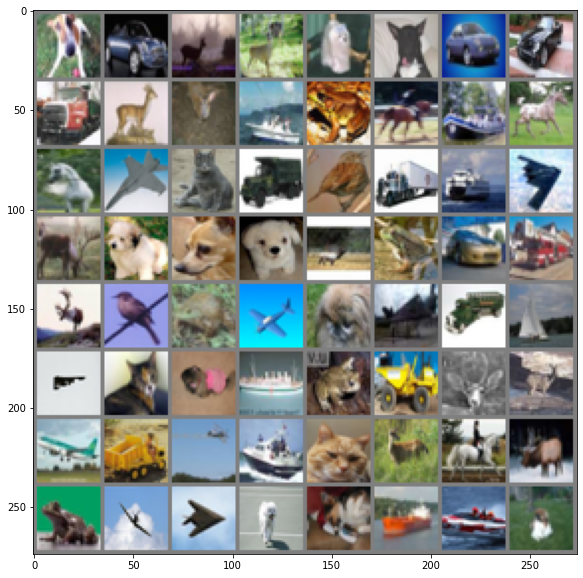

dog   car   deer  deer  dog   dog   car   car   truck deer  deer  ship  frog  horse ship  horse horse plane cat   truck bird  truck ship  plane deer  dog   dog   dog   deer  frog  car   truck deer  bird  frog  plane dog   plane truck ship  plane cat   dog   ship  frog  truck deer  deer  plane truck plane ship  cat   deer  horse deer  frog  plane plane dog   dog   ship  ship  dog  


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    plt.figure(figsize=(20,10))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [39]:
def truncate(x, k):
  z = x.reshape(-1)
  ind = torch.argsort(torch.abs(z), dim=-1)[-k:]
  res = torch.zeros(z.shape)#.cuda()
  res[ind] = z[ind]
  return res.reshape(x.shape)


def psi(p, x):
  return (torch.abs(x) ** (p - 1)) * torch.sign(x)


#Power Method
def get_noise(p, q, k, net):
  net.eval()
  x = torch.rand(3, 32, 32) #random initial estimation
  x /= torch.linalg.norm(x.flatten(), ord=p)

  p_1 = p / (p - 1)

  for i in range(10):
    #print(x[0][10:15, 10:15]) - convergence test
    x = torch.stack((x, x) * (batch_size // 2))

    _, Jx = autograd.functional.jvp(net, images, x)
    s = torch.linalg.norm(Jx.flatten(), ord=q)

    _, x = autograd.functional.vjp(net, images, psi(q, Jx))
    x = x.sum(dim=0)
    x = psi(p_1, x) * (s ** (q * p_1 - 1))

    x = truncate(x, k)

    x /= torch.linalg.norm(x.flatten(), ord=p)
  return x

In [40]:
from tqdm.notebook import tqdm


def fooling_rate(p, q, k):  #p, q - norms, k - sparsity
  fools = 0
  total = 0
  noise = get_noise(p, q, k, model)
  with torch.no_grad():
      for data in tqdm(testloader):
          images, labels = data
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)

          noisy = images + noise
          noisy = torch.tensor(noisy, dtype=torch.float, device=device)
          _, noisy_predicted = torch.max(model(noisy).data, 1)

          total += labels.size(0)
          fools += (noisy_predicted != predicted).sum().item()
          #print(fools)

  print(f'Fool rate: {100 * fools // total} %')

In [41]:
fooling_rate(2, 2, 2000)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-40-20ef1487a36e>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noisy = torch.tensor(noisy, dtype=torch.float, device=device)


Fool rate: 24 %


In [42]:
fooling_rate(torch.inf, 2, 100)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-40-20ef1487a36e>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noisy = torch.tensor(noisy, dtype=torch.float, device=device)


Fool rate: 100 %


In [43]:
fooling_rate(4, 6, 1500)

  0%|          | 0/157 [00:00<?, ?it/s]

<ipython-input-40-20ef1487a36e>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noisy = torch.tensor(noisy, dtype=torch.float, device=device)


Fool rate: 100 %


Infinity norm gives the best results since images are normalised to [0, 1] and noise with values 1 can distort them a lot.

# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g+\alpha_1u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [1]:
from PIL import Image, ImageOps

In [2]:
!wget "https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true" -O "./lena.png"

--2022-12-11 19:19:43--  https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/oseledets/nla2022/raw/main/hw2/lena.png [following]
--2022-12-11 19:19:43--  https://github.com/oseledets/nla2022/raw/main/hw2/lena.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png [following]
--2022-12-11 19:19:44--  https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20329 (

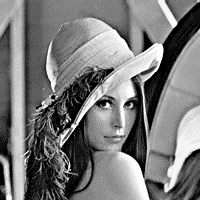

In [3]:
orig_image = ImageOps.grayscale(Image.open("lena.png"))
orig_image

*1*

In [4]:
def H_dot(f, h):
    in_shape = f.shape
    H = np.zeros((2 * in_shape[0] - 1, 2 * in_shape[1] - 1))
    H[:h.shape[0], :h.shape[1]] = h
    H = np.roll(H, (-(h.shape[0] // 2), -(h.shape[1] // 2)), axis=(0, 1))

    f = np.pad(f, ((0, in_shape[0] - 1), (0, in_shape[1] - 1)))

    g = np.fft.ifft2(np.fft.fft2(H) * np.fft.fft2(f))
    return g[:in_shape[0], :in_shape[1]].real

def H_T_dot(f, h):
    return H_dot(f, h.T)

*2*

In [5]:
def f_step(g, h, u, f0, l_1, steps):
    def A_dot(f):
        return H_T_dot(H_dot(f, h), h) + l_1 * f

    def scalar_dot(x, y):
        return x.flatten() @ y.flatten()
    
    
    b = H_T_dot(g, h) + l_1 * u
    
    fk = f0
    pk = rk = b - A_dot(f0)

    for _ in range(steps):
        A_pk = A_dot(pk)
        rk_norm = scalar_dot(rk, rk)

        alpha = rk_norm / scalar_dot(pk, A_pk)
        fk = fk + alpha * pk
        rk = rk - alpha * A_pk
        pk = rk + (scalar_dot(rk, rk) / rk_norm) * pk

    return fk

*3*

In [27]:
from skimage.restoration import denoise_tv_chambolle
def u_step(f, l_2):
    return denoise_tv_chambolle(f, weight=l_2) if l_2 > 0 else f

*4*

In [28]:
def restore(g, h, l_1, l_2, steps, cg_steps):
    uk = np.zeros_like(g)
    fk = np.zeros_like(g)
    for _ in tqdm(range(steps)):
        fk = f_step(g, h, uk, fk, l_1, cg_steps)
        uk = u_step(fk, l_2)

    return uk

*5*

In [12]:
h = 1 / 16 * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
f = np.array(orig_image)
g = H_dot(f, h) + 20 * np.random.normal(size=f.shape)

In [13]:
g.max(), g.min(), g.mean()

(311.971638900251, -68.62790320428509, 120.7151955880125)

In [29]:
restored = restore(g, h, l_1=0.5, l_2=0.7, steps=15, cg_steps=100)

  0%|          | 0/15 [00:00<?, ?it/s]

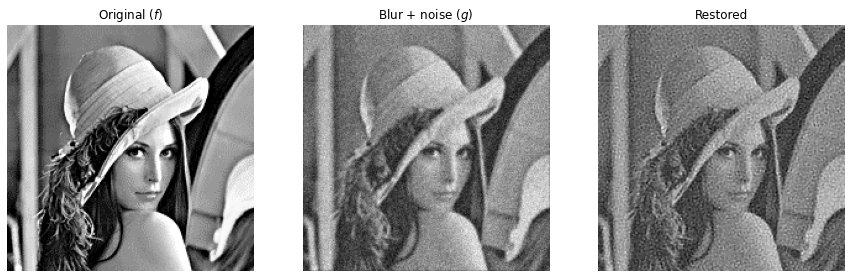

In [32]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
images = [f, g, restored]
titles = [r'Original ($f$)', r'Blur + noise ($g$)', r'Restored']
for i, im, title in zip(range(len(axes)), images, titles):
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(title)